In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('train_FD001.txt', sep=' ', header=None)

# Drop extra empty columns (if any)
df = df.dropna(axis=1, how='all')

# Dynamically assign column names
num_sensors = df.shape[1] - 5  # Calculate the number of sensor columns
df.columns = ['ID', 'Cycle', 'Op_Set1', 'Op_Set2', 'Op_Set3'] + [f'Sensor_{i}' for i in range(1, num_sensors + 1)]

df



,ID,Cycle,Op_Set1,Op_Set2,Op_Set3,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,...,Sensor_12,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [4]:
df= df.sort_values(by=['ID', 'Cycle']).reset_index(drop=True)


In [5]:
#RUL=EOL-Cycle
EOL = []
for i in df['ID']:  # Use unique IDs to avoid redundant iterations
    last_cycle = df[df['ID'] == i]['Cycle'].values[-1]  # Get the last cycle for the ID
    EOL.append(last_cycle)

df['EOL']=EOL
df


,ID,Cycle,Op_Set1,Op_Set2,Op_Set3,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,...,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Sensor_21,EOL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,192
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,200
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,200
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,200
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,200


In [6]:
# Calculate RUL
df['RUL']=df['EOL']-df['Cycle']
df=df.drop(columns=['EOL'])
df

,ID,Cycle,Op_Set1,Op_Set2,Op_Set3,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,...,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Sensor_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1


In [7]:
df.describe()


,ID,Cycle,Op_Set1,Op_Set2,Op_Set3,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,...,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Sensor_21,RUL
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,107.807862
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251,68.880990
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,0.000000
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,51.000000
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,103.000000
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,155.000000
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,361.000000


In [8]:
df.nunique(axis=0)

ID            100
Cycle         362
Op_Set1       158
Op_Set2        13
Op_Set3         1
Sensor_1        1
Sensor_2      310
Sensor_3     3012
Sensor_4     4051
Sensor_5        1
Sensor_6        2
Sensor_7      513
Sensor_8       53
Sensor_9     6403
Sensor_10       1
Sensor_11     159
Sensor_12     427
Sensor_13      56
Sensor_14    6078
Sensor_15    1918
Sensor_16       1
Sensor_17      13
Sensor_18       1
Sensor_19       1
Sensor_20     120
Sensor_21    4745
RUL           362
dtype: int64

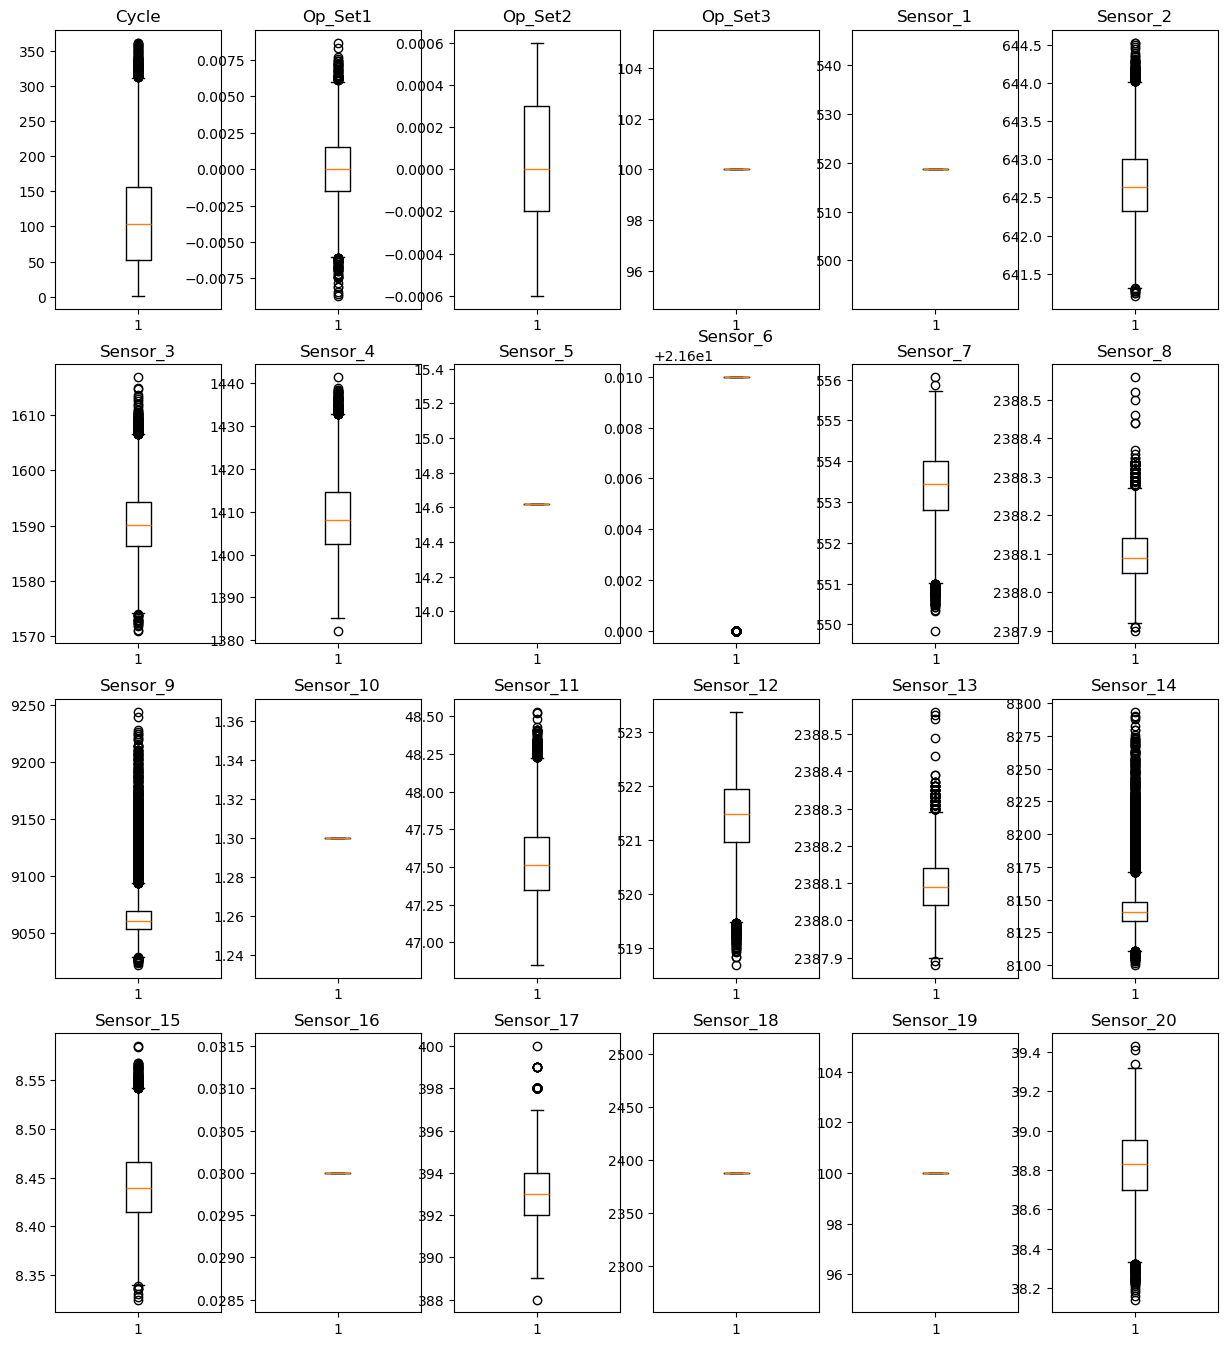

In [9]:

#Box plot

plt.figure(figsize=(15,21))
for i in np.arange(1,25):
    temp=df.iloc[:,i]
    plt.subplot(5,6,i)
    plt.boxplot(temp)
    plt.title(df.columns[i])
plt.show()

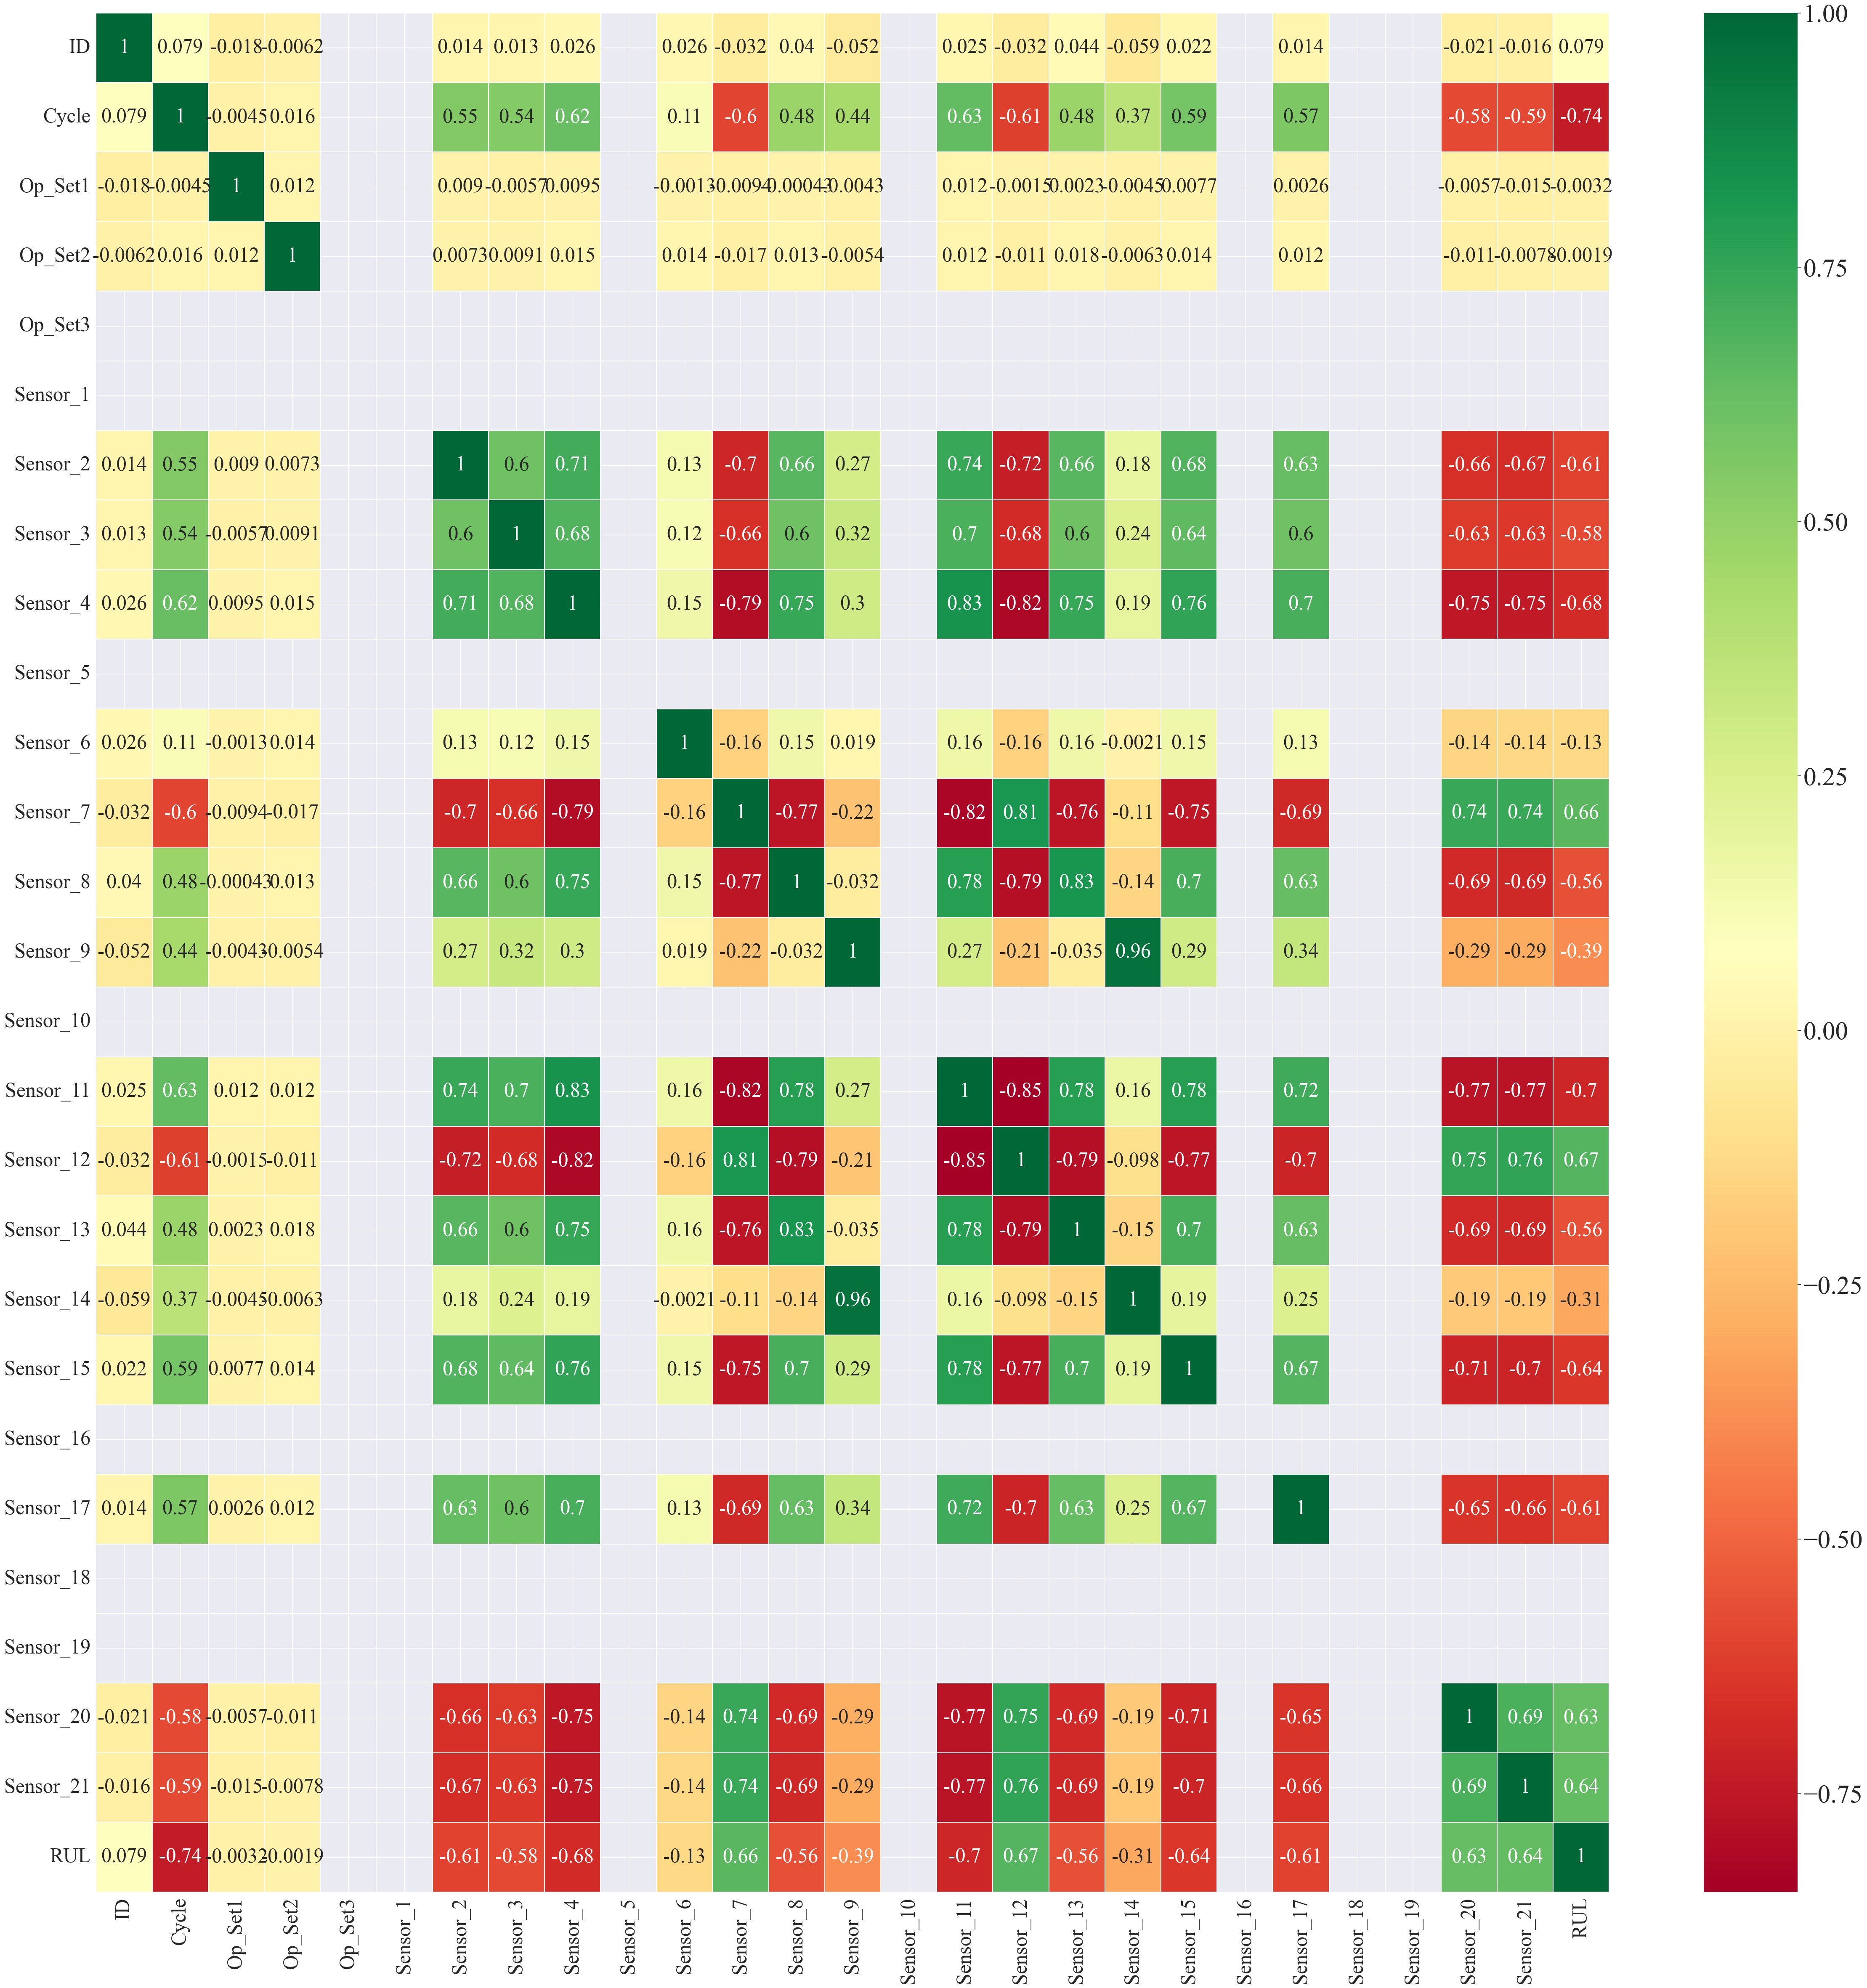

In [10]:
# corrmat = df.corr()
# Ensure `df` and `top_corr_features` are correctly defined
corrmat = df.corr()
top_corr_features = corrmat.index

# Configure the plot
plt.figure(figsize=(58, 58))  # Large figure for better visualization
sns.set(font_scale=4, font="Times New Roman")  # Font style and scale

# Plot the heatmap with the corrected colormap name
g = sns.heatmap(df[top_corr_features].corr(), 
                cmap='RdYlGn',  # Correct colormap name
                linewidths=0.1, 
                annot=True, 
                annot_kws={"size": 35})

# Adjust tick label sizes
g.set_xticklabels(g.get_xmajorticklabels(), fontsize=35)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize=35)

# Uncomment this to save the plot as an image
# plt.savefig('Corrplot.png', bbox_inches='tight')

# Display the plot
plt.show()


In [11]:
#Drop columns which have less than 0.5 correlation with RUL

delete_columns=[]
for col in df.columns:
    corr=df[col].corr(df['RUL'])
    if abs(corr)>0.5:
        pass
    else:
        delete_columns.append(col)

delete_columns

C:\Users\HP\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\HP\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


['ID',
 'Op_Set1',
 'Op_Set2',
 'Op_Set3',
 'Sensor_1',
 'Sensor_5',
 'Sensor_6',
 'Sensor_9',
 'Sensor_10',
 'Sensor_14',
 'Sensor_16',
 'Sensor_18',
 'Sensor_19']

In [12]:
df1=df.drop(columns=delete_columns)
df1

,Cycle,Sensor_2,Sensor_3,Sensor_4,Sensor_7,Sensor_8,Sensor_11,Sensor_12,Sensor_13,Sensor_15,Sensor_17,Sensor_20,Sensor_21,RUL
0,1,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,2,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,3,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,4,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,5,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,196,643.49,1597.98,1428.63,551.43,2388.19,48.07,519.49,2388.26,8.4956,397,38.49,22.9735,4
20627,197,643.54,1604.50,1433.58,550.86,2388.23,48.04,519.68,2388.22,8.5139,395,38.30,23.1594,3
20628,198,643.42,1602.46,1428.18,550.94,2388.24,48.09,520.01,2388.24,8.5646,398,38.44,22.9333,2
20629,199,643.23,1605.26,1426.53,550.68,2388.25,48.39,519.67,2388.23,8.5389,395,38.29,23.0640,1


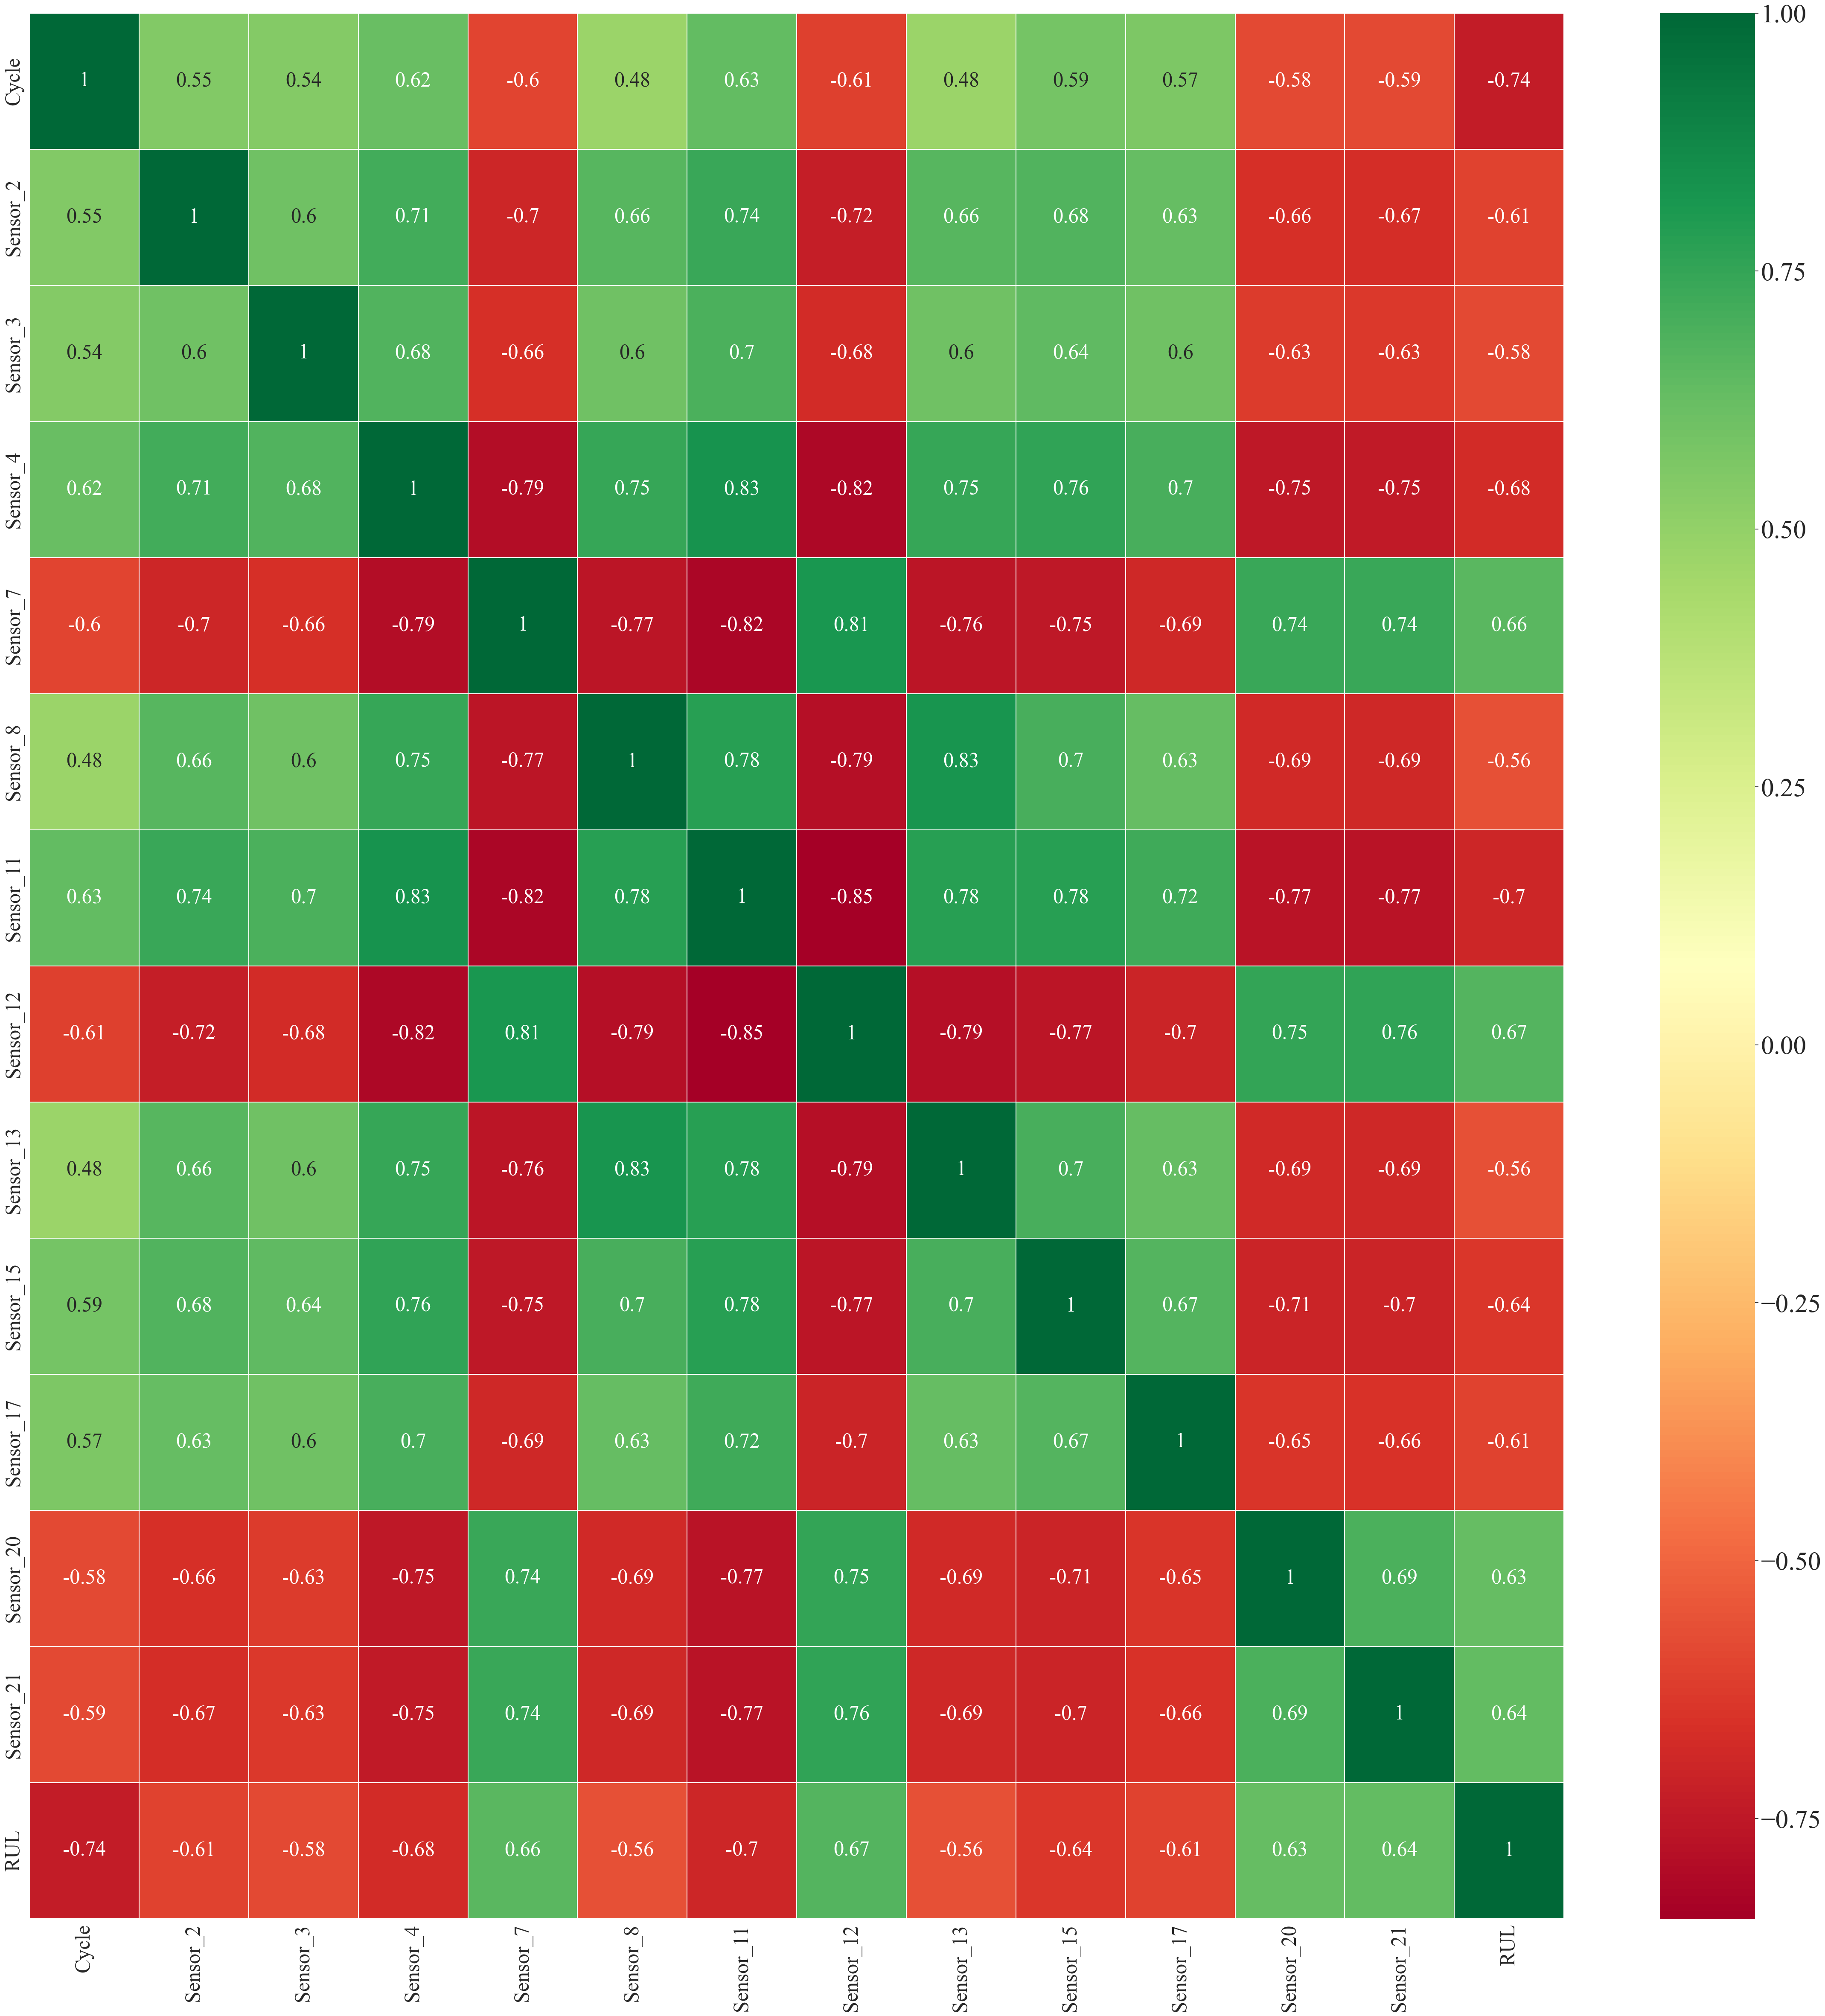

In [13]:
corrmat = df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(58, 58))
sns.set(font_scale=4, font="Times New Roman")
g = sns.heatmap(df[top_corr_features].corr(), 
                cmap='RdYlGn', 
                linewidths=0.1, 
                annot=True, 
                annot_kws={"size": 35})
g.set_xticklabels(g.get_xmajorticklabels(), fontsize=35)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize=35)
plt.show()


In [14]:
#Extra Tree Regression for Feature Importance

X=df1.iloc[:,0:13]
y=df1.iloc[:,13]
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)

[0.36536328 0.03126114 0.03072126 0.07690267 0.05357451 0.02581855
 0.12769893 0.08009637 0.02422093 0.05143293 0.02916419 0.04456149
 0.05918376]


<Axes: >

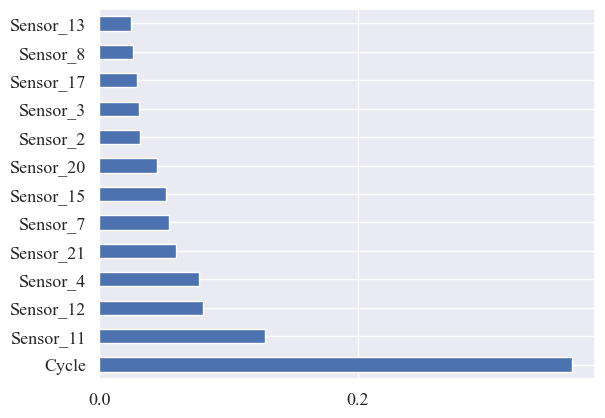

In [15]:
# Create a Series with feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

# Sort the features by importance in descending order
sorted_features = feat_importances.sort_values(ascending=False)
feat_importances.nlargest(13).plot(kind='barh',fontsize=13)

In [16]:
X=df1.iloc[:,0:-1]
y=df1.iloc[:,13]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=False)

from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)

y_pred=regressor.predict(X_test)

from sklearn import metrics
print('RMSE on test set',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

y_pred_train=regressor.predict(X_train)
print('RMSE on training set',np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))

RMSE on test set 50.80522361548879
RMSE on training set 12.61211925788962


In [17]:
#Forward Feature Selection

sorted_features.keys()

Index(['Cycle', 'Sensor_11', 'Sensor_12', 'Sensor_4', 'Sensor_21', 'Sensor_7',
       'Sensor_15', 'Sensor_20', 'Sensor_2', 'Sensor_3', 'Sensor_17',
       'Sensor_8', 'Sensor_13'],
      dtype='object')

In [18]:
new_df=df1[['Cycle', 'Sensor_11', 'Sensor_12', 'Sensor_4', 'Sensor_7', 'Sensor_15',
       'Sensor_21', 'Sensor_20', 'Sensor_17', 'Sensor_3', 'Sensor_2',
       'Sensor_8', 'Sensor_13']]

In [19]:
new_df

,Cycle,Sensor_11,Sensor_12,Sensor_4,Sensor_7,Sensor_15,Sensor_21,Sensor_20,Sensor_17,Sensor_3,Sensor_2,Sensor_8,Sensor_13
0,1,47.47,521.66,1400.60,554.36,8.4195,23.4190,39.06,392,1589.70,641.82,2388.06,2388.02
1,2,47.49,522.28,1403.14,553.75,8.4318,23.4236,39.00,392,1591.82,642.15,2388.04,2388.07
2,3,47.27,522.42,1404.20,554.26,8.4178,23.3442,38.95,390,1587.99,642.35,2388.08,2388.03
3,4,47.13,522.86,1401.87,554.45,8.3682,23.3739,38.88,392,1582.79,642.35,2388.11,2388.08
4,5,47.28,522.19,1406.22,554.00,8.4294,23.4044,38.90,393,1582.85,642.37,2388.06,2388.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,196,48.07,519.49,1428.63,551.43,8.4956,22.9735,38.49,397,1597.98,643.49,2388.19,2388.26
20627,197,48.04,519.68,1433.58,550.86,8.5139,23.1594,38.30,395,1604.50,643.54,2388.23,2388.22
20628,198,48.09,520.01,1428.18,550.94,8.5646,22.9333,38.44,398,1602.46,643.42,2388.24,2388.24
20629,199,48.39,519.67,1426.53,550.68,8.5389,23.0640,38.29,395,1605.26,643.23,2388.25,2388.23


In [20]:
number_of_features=[]
test_rmse=[]
train_rmse=[]

for i in range(1,13):
    number_of_features.append(i)
    X=new_df.iloc[:,0:i]
    y=df1.iloc[:,13]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=False)
    regressor=RandomForestRegressor()
    regressor.fit(X_train,y_train)


    print('Total features used',i)
    y_pred=regressor.predict(X_test)
    test_rmse.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    print('RMSE on Test Set:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

    y_pred_train=regressor.predict(X_train)
    train_rmse.append(np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))
    print('RMSE on Training Set:',np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))

    print('\n')


Total features used 1
RMSE on Test Set: 60.3510590049506
RMSE on Training Set: 39.33032079337561


Total features used 2
RMSE on Test Set: 55.786744254190914
RMSE on Training Set: 23.500823921649314


Total features used 3
RMSE on Test Set: 53.180450326662644
RMSE on Training Set: 13.841154108244918


Total features used 4
RMSE on Test Set: 51.94281080062609
RMSE on Training Set: 13.164215351029808


Total features used 5
RMSE on Test Set: 51.691460222151115
RMSE on Training Set: 13.007980906446695


Total features used 6
RMSE on Test Set: 51.18142460970337
RMSE on Training Set: 12.889777087163376


Total features used 7
RMSE on Test Set: 51.29831378433944
RMSE on Training Set: 12.830419957450227


Total features used 8
RMSE on Test Set: 51.179591955540666
RMSE on Training Set: 12.746186200726738


Total features used 9
RMSE on Test Set: 51.16291654595868
RMSE on Training Set: 12.746934028730841


Total features used 10
RMSE on Test Set: 50.90143861298357
RMSE on Training Set: 12.67633


Making Training Dataset

In [21]:
raw_data=pd.read_csv('train_FD001.txt',sep=' ',header=None)
raw_data

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN


In [22]:
raw_data=raw_data.drop([26,27],axis='columns')
raw_data

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [23]:
raw_data.columns = ['ID', 'Cycle', 'Op_Set1', 'Op_Set2', 'Op_Set3'] + [f'Sensor_{i}' for i in range(1, num_sensors + 1)]

In [24]:
raw_data

,ID,Cycle,Op_Set1,Op_Set2,Op_Set3,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,...,Sensor_12,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [25]:
#RUL=EOL-Cycle
EOL = []
for i in raw_data['ID']:  # Use unique IDs to avoid redundant iterations
    last_cycle = raw_data[raw_data['ID'] == i]['Cycle'].values[-1]  # Get the last cycle for the ID
    EOL.append(last_cycle)

raw_data['EOL']=EOL
raw_data




,ID,Cycle,Op_Set1,Op_Set2,Op_Set3,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,...,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Sensor_21,EOL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,192
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,200
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,200
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,200
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,200


In [26]:
# Calculate RUL
raw_data['RUL']=raw_data['EOL']-raw_data['Cycle']
raw_data=raw_data.drop(columns=['EOL'])
raw_data

,ID,Cycle,Op_Set1,Op_Set2,Op_Set3,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,...,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Sensor_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1


In [27]:
delete_columns=['Op_Set1','Op_Set2','Op_Set3','Sensor_1','Sensor_5','Sensor_6','Sensor_9','Sensor_10','Sensor_14','Sensor_16','Sensor_18','Sensor_19']	

In [28]:
raw_data=raw_data.drop(columns=delete_columns)
raw_data

,ID,Cycle,Sensor_2,Sensor_3,Sensor_4,Sensor_7,Sensor_8,Sensor_11,Sensor_12,Sensor_13,Sensor_15,Sensor_17,Sensor_20,Sensor_21,RUL
0,1,1,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,1,2,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,1,3,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,1,4,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,1,5,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,643.49,1597.98,1428.63,551.43,2388.19,48.07,519.49,2388.26,8.4956,397,38.49,22.9735,4
20627,100,197,643.54,1604.50,1433.58,550.86,2388.23,48.04,519.68,2388.22,8.5139,395,38.30,23.1594,3
20628,100,198,643.42,1602.46,1428.18,550.94,2388.24,48.09,520.01,2388.24,8.5646,398,38.44,22.9333,2
20629,100,199,643.23,1605.26,1426.53,550.68,2388.25,48.39,519.67,2388.23,8.5389,395,38.29,23.0640,1


In [29]:
raw_data.to_csv('Processed_train_001.csv',index=None)

In [30]:
raw_data=pd.read_csv('Processed_train_001.csv')

In [31]:
raw_data

,ID,Cycle,Sensor_2,Sensor_3,Sensor_4,Sensor_7,Sensor_8,Sensor_11,Sensor_12,Sensor_13,Sensor_15,Sensor_17,Sensor_20,Sensor_21,RUL
0,1,1,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,1,2,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,1,3,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,1,4,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,1,5,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,643.49,1597.98,1428.63,551.43,2388.19,48.07,519.49,2388.26,8.4956,397,38.49,22.9735,4
20627,100,197,643.54,1604.50,1433.58,550.86,2388.23,48.04,519.68,2388.22,8.5139,395,38.30,23.1594,3
20628,100,198,643.42,1602.46,1428.18,550.94,2388.24,48.09,520.01,2388.24,8.5646,398,38.44,22.9333,2
20629,100,199,643.23,1605.26,1426.53,550.68,2388.25,48.39,519.67,2388.23,8.5389,395,38.29,23.0640,1


In [32]:

raw_data1=pd.read_csv('train_FD002.txt',sep=' ',header=None)
raw_data1

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071,NaN,NaN
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665,NaN,NaN
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723,NaN,NaN
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701,NaN,NaN
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,20.0037,0.7000,100.0,491.19,608.79,1495.60,1269.51,9.35,...,8169.64,9.3035,0.03,369,2324,100.00,24.36,14.5189,NaN,NaN
53755,260,313,10.0022,0.2510,100.0,489.05,605.81,1514.32,1324.12,10.52,...,8245.36,8.7586,0.03,374,2319,100.00,28.10,16.9454,NaN,NaN
53756,260,314,25.0041,0.6200,60.0,462.54,537.48,1276.24,1057.92,7.05,...,7971.25,11.0657,0.02,310,1915,84.93,14.19,8.5503,NaN,NaN
53757,260,315,25.0033,0.6220,60.0,462.54,537.84,1272.95,1066.30,7.05,...,7972.47,11.0537,0.02,311,1915,84.93,14.05,8.3729,NaN,NaN


In [33]:
raw_data1=raw_data1.drop([26,27],axis='columns')
raw_data1

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,20.0037,0.7000,100.0,491.19,608.79,1495.60,1269.51,9.35,...,314.05,2389.02,8169.64,9.3035,0.03,369,2324,100.00,24.36,14.5189
53755,260,313,10.0022,0.2510,100.0,489.05,605.81,1514.32,1324.12,10.52,...,371.22,2388.42,8245.36,8.7586,0.03,374,2319,100.00,28.10,16.9454
53756,260,314,25.0041,0.6200,60.0,462.54,537.48,1276.24,1057.92,7.05,...,163.74,2030.33,7971.25,11.0657,0.02,310,1915,84.93,14.19,8.5503
53757,260,315,25.0033,0.6220,60.0,462.54,537.84,1272.95,1066.30,7.05,...,164.37,2030.35,7972.47,11.0537,0.02,311,1915,84.93,14.05,8.3729


In [34]:
raw_data1.columns = ['ID', 'Cycle', 'Op_Set1', 'Op_Set2', 'Op_Set3'] + [f'Sensor_{i}' for i in range(1, num_sensors + 1)]

In [35]:
#RUL=EOL-Cycle
EOL = []
for i in raw_data1['ID']:  # Use unique IDs to avoid redundant iterations
    last_cycle = raw_data1[raw_data1['ID'] == i]['Cycle'].values[-1]  # Get the last cycle for the ID
    EOL.append(last_cycle)

raw_data1['EOL']=EOL
raw_data1




,ID,Cycle,Op_Set1,Op_Set2,Op_Set3,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,...,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Sensor_21,EOL
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071,149
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665,149
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723,149
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701,149
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,20.0037,0.7000,100.0,491.19,608.79,1495.60,1269.51,9.35,...,2389.02,8169.64,9.3035,0.03,369,2324,100.00,24.36,14.5189,316
53755,260,313,10.0022,0.2510,100.0,489.05,605.81,1514.32,1324.12,10.52,...,2388.42,8245.36,8.7586,0.03,374,2319,100.00,28.10,16.9454,316
53756,260,314,25.0041,0.6200,60.0,462.54,537.48,1276.24,1057.92,7.05,...,2030.33,7971.25,11.0657,0.02,310,1915,84.93,14.19,8.5503,316
53757,260,315,25.0033,0.6220,60.0,462.54,537.84,1272.95,1066.30,7.05,...,2030.35,7972.47,11.0537,0.02,311,1915,84.93,14.05,8.3729,316


In [36]:
# Calculate RUL
raw_data1['RUL']=raw_data1['EOL']-raw_data1['Cycle']
raw_data1=raw_data1.drop(columns=['EOL'])
raw_data1

,ID,Cycle,Op_Set1,Op_Set2,Op_Set3,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,...,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Sensor_21,RUL
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071,148
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665,147
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723,146
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701,145
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,20.0037,0.7000,100.0,491.19,608.79,1495.60,1269.51,9.35,...,2389.02,8169.64,9.3035,0.03,369,2324,100.00,24.36,14.5189,4
53755,260,313,10.0022,0.2510,100.0,489.05,605.81,1514.32,1324.12,10.52,...,2388.42,8245.36,8.7586,0.03,374,2319,100.00,28.10,16.9454,3
53756,260,314,25.0041,0.6200,60.0,462.54,537.48,1276.24,1057.92,7.05,...,2030.33,7971.25,11.0657,0.02,310,1915,84.93,14.19,8.5503,2
53757,260,315,25.0033,0.6220,60.0,462.54,537.84,1272.95,1066.30,7.05,...,2030.35,7972.47,11.0537,0.02,311,1915,84.93,14.05,8.3729,1


In [37]:
delete_columns=['Op_Set1','Op_Set2','Op_Set3','Sensor_1','Sensor_5','Sensor_6','Sensor_9','Sensor_10','Sensor_14','Sensor_16','Sensor_18','Sensor_19']	

In [38]:

raw_data1=raw_data1.drop(columns=delete_columns)
raw_data1

,ID,Cycle,Sensor_2,Sensor_3,Sensor_4,Sensor_7,Sensor_8,Sensor_11,Sensor_12,Sensor_13,Sensor_15,Sensor_17,Sensor_20,Sensor_21,RUL
0,1,1,555.32,1358.61,1137.23,194.64,2222.65,42.02,183.06,2387.72,9.3461,334,14.73,8.8071,148
1,1,2,549.90,1353.22,1125.78,138.51,2211.57,42.20,130.42,2387.66,9.3774,330,10.41,6.2665,147
2,1,3,537.31,1256.76,1047.45,175.71,1915.11,36.69,164.22,2028.03,10.8941,309,14.08,8.6723,146
3,1,4,549.51,1354.03,1126.38,138.46,2211.58,41.96,130.72,2387.61,9.3528,329,10.59,6.4701,145
4,1,5,537.07,1257.71,1047.93,175.05,1915.10,36.89,164.31,2028.00,10.8963,309,14.13,8.5286,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,608.79,1495.60,1269.51,334.00,2324.92,44.72,314.05,2389.02,9.3035,369,24.36,14.5189,4
53755,260,313,605.81,1514.32,1324.12,392.46,2319.17,46.08,371.22,2388.42,8.7586,374,28.10,16.9454,3
53756,260,314,537.48,1276.24,1057.92,175.11,1917.37,37.14,163.74,2030.33,11.0657,310,14.19,8.5503,2
53757,260,315,537.84,1272.95,1066.30,174.81,1917.36,37.32,164.37,2030.35,11.0537,311,14.05,8.3729,1


In [39]:
raw_data1.to_csv('Processed_train_002.csv',index=None)

In [40]:
raw_data1=pd.read_csv('Processed_train_002.csv')

In [41]:
raw_data2=pd.read_csv('train_FD003.txt',sep=' ',header=None)
raw_data2

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537,NaN,NaN
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491,NaN,NaN
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669,NaN,NaN
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951,NaN,NaN
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24715,100,148,-0.0016,-0.0003,100.0,518.67,643.78,1596.01,1424.11,14.62,...,8138.08,8.5036,0.03,394,2388,100.0,38.44,22.9631,NaN,NaN
24716,100,149,0.0034,-0.0003,100.0,518.67,643.29,1596.38,1429.14,14.62,...,8144.36,8.5174,0.03,395,2388,100.0,38.50,22.9746,NaN,NaN
24717,100,150,-0.0016,0.0004,100.0,518.67,643.84,1604.53,1431.41,14.62,...,8135.95,8.5223,0.03,396,2388,100.0,38.39,23.0682,NaN,NaN
24718,100,151,-0.0023,0.0004,100.0,518.67,643.94,1597.56,1426.57,14.62,...,8141.24,8.5148,0.03,395,2388,100.0,38.31,23.0753,NaN,NaN


In [42]:
raw_data2=raw_data2.drop([26,27],axis='columns')
raw_data2

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,522.31,2388.01,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,522.42,2388.03,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,522.03,2388.00,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,522.49,2388.08,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,522.58,2388.03,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24715,100,148,-0.0016,-0.0003,100.0,518.67,643.78,1596.01,1424.11,14.62,...,519.66,2388.30,8138.08,8.5036,0.03,394,2388,100.0,38.44,22.9631
24716,100,149,0.0034,-0.0003,100.0,518.67,643.29,1596.38,1429.14,14.62,...,519.91,2388.28,8144.36,8.5174,0.03,395,2388,100.0,38.50,22.9746
24717,100,150,-0.0016,0.0004,100.0,518.67,643.84,1604.53,1431.41,14.62,...,519.44,2388.24,8135.95,8.5223,0.03,396,2388,100.0,38.39,23.0682
24718,100,151,-0.0023,0.0004,100.0,518.67,643.94,1597.56,1426.57,14.62,...,520.01,2388.26,8141.24,8.5148,0.03,395,2388,100.0,38.31,23.0753


In [43]:
raw_data2.columns = ['ID', 'Cycle', 'Op_Set1', 'Op_Set2', 'Op_Set3'] + [f'Sensor_{i}' for i in range(1, num_sensors + 1)]

In [44]:
#RUL=EOL-Cycle
EOL = []
for i in raw_data2['ID']:  # Use unique IDs to avoid redundant iterations
    last_cycle = raw_data2[raw_data2['ID'] == i]['Cycle'].values[-1]  # Get the last cycle for the ID
    EOL.append(last_cycle)

raw_data2['EOL']=EOL
raw_data2



,ID,Cycle,Op_Set1,Op_Set2,Op_Set3,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,...,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Sensor_21,EOL
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,2388.01,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537,259
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,2388.03,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491,259
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,2388.00,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669,259
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,2388.08,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951,259
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,2388.03,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583,259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24715,100,148,-0.0016,-0.0003,100.0,518.67,643.78,1596.01,1424.11,14.62,...,2388.30,8138.08,8.5036,0.03,394,2388,100.0,38.44,22.9631,152
24716,100,149,0.0034,-0.0003,100.0,518.67,643.29,1596.38,1429.14,14.62,...,2388.28,8144.36,8.5174,0.03,395,2388,100.0,38.50,22.9746,152
24717,100,150,-0.0016,0.0004,100.0,518.67,643.84,1604.53,1431.41,14.62,...,2388.24,8135.95,8.5223,0.03,396,2388,100.0,38.39,23.0682,152
24718,100,151,-0.0023,0.0004,100.0,518.67,643.94,1597.56,1426.57,14.62,...,2388.26,8141.24,8.5148,0.03,395,2388,100.0,38.31,23.0753,152


In [45]:
# Calculate RUL
raw_data2['RUL']=raw_data2['EOL']-raw_data2['Cycle']
raw_data2=raw_data2.drop(columns=['EOL'])
raw_data2

,ID,Cycle,Op_Set1,Op_Set2,Op_Set3,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,...,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Sensor_21,RUL
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,2388.01,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537,258
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,2388.03,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491,257
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,2388.00,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669,256
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,2388.08,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951,255
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,2388.03,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583,254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24715,100,148,-0.0016,-0.0003,100.0,518.67,643.78,1596.01,1424.11,14.62,...,2388.30,8138.08,8.5036,0.03,394,2388,100.0,38.44,22.9631,4
24716,100,149,0.0034,-0.0003,100.0,518.67,643.29,1596.38,1429.14,14.62,...,2388.28,8144.36,8.5174,0.03,395,2388,100.0,38.50,22.9746,3
24717,100,150,-0.0016,0.0004,100.0,518.67,643.84,1604.53,1431.41,14.62,...,2388.24,8135.95,8.5223,0.03,396,2388,100.0,38.39,23.0682,2
24718,100,151,-0.0023,0.0004,100.0,518.67,643.94,1597.56,1426.57,14.62,...,2388.26,8141.24,8.5148,0.03,395,2388,100.0,38.31,23.0753,1


In [46]:
delete_columns=['Op_Set1','Op_Set2','Op_Set3','Sensor_1','Sensor_5','Sensor_6','Sensor_9','Sensor_10','Sensor_14','Sensor_16','Sensor_18','Sensor_19']	

In [47]:
raw_data2=raw_data2.drop(columns=delete_columns)
raw_data2

,ID,Cycle,Sensor_2,Sensor_3,Sensor_4,Sensor_7,Sensor_8,Sensor_11,Sensor_12,Sensor_13,Sensor_15,Sensor_17,Sensor_20,Sensor_21,RUL
0,1,1,642.36,1583.23,1396.84,553.97,2387.96,47.30,522.31,2388.01,8.4246,391,39.11,23.3537,258
1,1,2,642.50,1584.69,1396.89,554.55,2388.00,47.23,522.42,2388.03,8.4403,392,38.99,23.4491,257
2,1,3,642.18,1582.35,1405.61,554.43,2388.03,47.22,522.03,2388.00,8.3901,391,38.85,23.3669,256
3,1,4,642.92,1585.61,1392.27,555.21,2388.00,47.24,522.49,2388.08,8.3878,392,38.96,23.2951,255
4,1,5,641.68,1588.63,1397.65,554.74,2388.04,47.15,522.58,2388.03,8.3869,392,39.14,23.4583,254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24715,100,148,643.78,1596.01,1424.11,551.86,2388.25,48.27,519.66,2388.30,8.5036,394,38.44,22.9631,4
24716,100,149,643.29,1596.38,1429.14,551.86,2388.23,48.13,519.91,2388.28,8.5174,395,38.50,22.9746,3
24717,100,150,643.84,1604.53,1431.41,551.30,2388.25,48.18,519.44,2388.24,8.5223,396,38.39,23.0682,2
24718,100,151,643.94,1597.56,1426.57,550.69,2388.26,48.05,520.01,2388.26,8.5148,395,38.31,23.0753,1


In [48]:
raw_data2.to_csv('Processed_train_003.csv',index=None)

In [49]:
raw_data2=pd.read_csv('Processed_train_003.csv')

In [50]:
raw_data3=pd.read_csv('train_FD004.txt',sep=' ',header=None)
raw_data3

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670,NaN,NaN
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552,NaN,NaN
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,...,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213,NaN,NaN
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,...,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176,NaN,NaN
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,...,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244,249,251,9.9998,0.2500,100.0,489.05,605.33,1516.36,1315.28,10.52,...,8185.69,8.4541,0.03,372,2319,100.00,29.11,17.5234,NaN,NaN
61245,249,252,0.0028,0.0015,100.0,518.67,643.42,1598.92,1426.77,14.62,...,8185.47,8.2221,0.03,396,2388,100.00,39.38,23.7151,NaN,NaN
61246,249,253,0.0029,0.0000,100.0,518.67,643.68,1607.72,1430.56,14.62,...,8193.94,8.2525,0.03,395,2388,100.00,39.78,23.8270,NaN,NaN
61247,249,254,35.0046,0.8400,100.0,449.44,555.77,1381.29,1148.18,5.48,...,8125.64,9.0515,0.02,337,2223,100.00,15.26,9.0774,NaN,NaN


In [51]:
raw_data3=raw_data3.drop([26,27],axis='columns')
raw_data3

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,129.78,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,312.59,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,...,129.62,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,...,129.80,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,...,164.11,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244,249,251,9.9998,0.2500,100.0,489.05,605.33,1516.36,1315.28,10.52,...,380.16,2388.73,8185.69,8.4541,0.03,372,2319,100.00,29.11,17.5234
61245,249,252,0.0028,0.0015,100.0,518.67,643.42,1598.92,1426.77,14.62,...,535.02,2388.46,8185.47,8.2221,0.03,396,2388,100.00,39.38,23.7151
61246,249,253,0.0029,0.0000,100.0,518.67,643.68,1607.72,1430.56,14.62,...,535.41,2388.48,8193.94,8.2525,0.03,395,2388,100.00,39.78,23.8270
61247,249,254,35.0046,0.8400,100.0,449.44,555.77,1381.29,1148.18,5.48,...,187.92,2388.83,8125.64,9.0515,0.02,337,2223,100.00,15.26,9.0774


In [52]:
raw_data3.columns = ['ID', 'Cycle', 'Op_Set1', 'Op_Set2', 'Op_Set3'] + [f'Sensor_{i}' for i in range(1, num_sensors + 1)]

In [53]:
#RUL=EOL-Cycle
EOL = []
for i in raw_data3['ID']:  # Use unique IDs to avoid redundant iterations
    last_cycle = raw_data3[raw_data3['ID'] == i]['Cycle'].values[-1]  # Get the last cycle for the ID
    EOL.append(last_cycle)

raw_data3['EOL']=EOL
raw_data3



,ID,Cycle,Op_Set1,Op_Set2,Op_Set3,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,...,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Sensor_21,EOL
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670,321
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552,321
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,...,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213,321
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,...,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176,321
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,...,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754,321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244,249,251,9.9998,0.2500,100.0,489.05,605.33,1516.36,1315.28,10.52,...,2388.73,8185.69,8.4541,0.03,372,2319,100.00,29.11,17.5234,255
61245,249,252,0.0028,0.0015,100.0,518.67,643.42,1598.92,1426.77,14.62,...,2388.46,8185.47,8.2221,0.03,396,2388,100.00,39.38,23.7151,255
61246,249,253,0.0029,0.0000,100.0,518.67,643.68,1607.72,1430.56,14.62,...,2388.48,8193.94,8.2525,0.03,395,2388,100.00,39.78,23.8270,255
61247,249,254,35.0046,0.8400,100.0,449.44,555.77,1381.29,1148.18,5.48,...,2388.83,8125.64,9.0515,0.02,337,2223,100.00,15.26,9.0774,255


In [54]:
# Calculate RUL
raw_data3['RUL']=raw_data3['EOL']-raw_data3['Cycle']
raw_data3=raw_data3.drop(columns=['EOL'])
raw_data3

,ID,Cycle,Op_Set1,Op_Set2,Op_Set3,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,...,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Sensor_21,RUL
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670,320
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552,319
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,...,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213,318
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,...,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176,317
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,...,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754,316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244,249,251,9.9998,0.2500,100.0,489.05,605.33,1516.36,1315.28,10.52,...,2388.73,8185.69,8.4541,0.03,372,2319,100.00,29.11,17.5234,4
61245,249,252,0.0028,0.0015,100.0,518.67,643.42,1598.92,1426.77,14.62,...,2388.46,8185.47,8.2221,0.03,396,2388,100.00,39.38,23.7151,3
61246,249,253,0.0029,0.0000,100.0,518.67,643.68,1607.72,1430.56,14.62,...,2388.48,8193.94,8.2525,0.03,395,2388,100.00,39.78,23.8270,2
61247,249,254,35.0046,0.8400,100.0,449.44,555.77,1381.29,1148.18,5.48,...,2388.83,8125.64,9.0515,0.02,337,2223,100.00,15.26,9.0774,1


In [55]:
delete_columns=['Op_Set1','Op_Set2','Op_Set3','Sensor_1','Sensor_5','Sensor_6','Sensor_9','Sensor_10','Sensor_14','Sensor_16','Sensor_18','Sensor_19']	

In [56]:

raw_data3=raw_data3.drop(columns=delete_columns)
raw_data3

,ID,Cycle,Sensor_2,Sensor_3,Sensor_4,Sensor_7,Sensor_8,Sensor_11,Sensor_12,Sensor_13,Sensor_15,Sensor_17,Sensor_20,Sensor_21,RUL
0,1,1,549.68,1343.43,1112.93,137.36,2211.86,41.69,129.78,2387.99,9.3335,330,10.62,6.3670,320
1,1,2,606.07,1477.61,1237.50,332.10,2323.66,43.94,312.59,2387.73,9.1913,361,24.37,14.6552,319
2,1,3,548.95,1343.12,1117.05,138.18,2211.92,41.66,129.62,2387.97,9.4007,329,10.48,6.4213,318
3,1,4,548.70,1341.24,1118.03,137.98,2211.88,41.68,129.80,2388.02,9.3369,328,10.54,6.4176,317
4,1,5,536.10,1255.23,1033.59,174.82,1915.22,36.48,164.11,2028.08,10.8366,305,14.03,8.6754,316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244,249,251,605.33,1516.36,1315.28,404.59,2319.66,46.08,380.16,2388.73,8.4541,372,29.11,17.5234,4
61245,249,252,643.42,1598.92,1426.77,567.59,2388.47,48.04,535.02,2388.46,8.2221,396,39.38,23.7151,3
61246,249,253,643.68,1607.72,1430.56,569.04,2388.51,48.24,535.41,2388.48,8.2525,395,39.78,23.8270,2
61247,249,254,555.77,1381.29,1148.18,199.93,2223.78,42.53,187.92,2388.83,9.0515,337,15.26,9.0774,1


In [57]:
raw_data3.to_csv('Processed_train_004.csv',index=None)

In [58]:
raw_data3=pd.read_csv('Processed_train_004.csv')

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [60]:
def give_Test_engine(Test_no, engine_id):
    # Construct the filename using the Train_no
    filename = f"Processed_train_00{Test_no}.csv"
    # Read the CSV file
    df_test = pd.read_csv(filename)
    
    # Filter the data for the specific engine_id
    test = df_test[df_test['ID'] == engine_id]
    test = test.drop(columns=['ID'])
    
    # Split into features (X_train) and target (y_train)
    X_test = test.iloc[:, :-1]
    y_test = test.iloc[:, -1]
    
    return X_test, y_test
    

In [61]:
def give_Train_engine(Train_no, engine_id):
    # Construct the filename using the Train_no
    filename = f"Processed_train_00{Train_no}.csv"
    # Read the CSV file
    df_train = pd.read_csv(filename)
    
    # Filter the data for the specific engine_id
    train = df_train[df_train['ID'] == engine_id]
    train = train.drop(columns=['ID'])
    
    # Split into features (X_train) and target (y_train)
    X_train = train.iloc[:, :-1]
    y_train = train.iloc[:, -1]
    
    return X_train, y_train 
    

In [62]:
#Importing all training data
df_train=pd.concat([raw_data,raw_data1,raw_data2,raw_data3])

In [63]:
df_train

,ID,Cycle,Sensor_2,Sensor_3,Sensor_4,Sensor_7,Sensor_8,Sensor_11,Sensor_12,Sensor_13,Sensor_15,Sensor_17,Sensor_20,Sensor_21,RUL
0,1,1,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,1,2,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,1,3,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,1,4,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,1,5,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244,249,251,605.33,1516.36,1315.28,404.59,2319.66,46.08,380.16,2388.73,8.4541,372,29.11,17.5234,4
61245,249,252,643.42,1598.92,1426.77,567.59,2388.47,48.04,535.02,2388.46,8.2221,396,39.38,23.7151,3
61246,249,253,643.68,1607.72,1430.56,569.04,2388.51,48.24,535.41,2388.48,8.2525,395,39.78,23.8270,2
61247,249,254,555.77,1381.29,1148.18,199.93,2223.78,42.53,187.92,2388.83,9.0515,337,15.26,9.0774,1


In [64]:
df_train=df_train.drop(columns=['ID'])
df_train

,Cycle,Sensor_2,Sensor_3,Sensor_4,Sensor_7,Sensor_8,Sensor_11,Sensor_12,Sensor_13,Sensor_15,Sensor_17,Sensor_20,Sensor_21,RUL
0,1,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,2,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,3,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,4,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,5,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244,251,605.33,1516.36,1315.28,404.59,2319.66,46.08,380.16,2388.73,8.4541,372,29.11,17.5234,4
61245,252,643.42,1598.92,1426.77,567.59,2388.47,48.04,535.02,2388.46,8.2221,396,39.38,23.7151,3
61246,253,643.68,1607.72,1430.56,569.04,2388.51,48.24,535.41,2388.48,8.2525,395,39.78,23.8270,2
61247,254,555.77,1381.29,1148.18,199.93,2223.78,42.53,187.92,2388.83,9.0515,337,15.26,9.0774,1


In [65]:
X=df_train.iloc[:,0:-1]
y=df_train.iloc[:,-1]

In [66]:
print(X.shape)
print(y.shape)


(160359, 13)
(160359,)


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [68]:

regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [69]:
y_pred=regressor.predict(X_test)
print('RMSE on Test Set:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

y_pred_train=regressor.predict(X_train)
print('RMSE on Training set:',np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))


RMSE on Test Set: 53.03842723121617
RMSE on Training set: 16.735555466763678


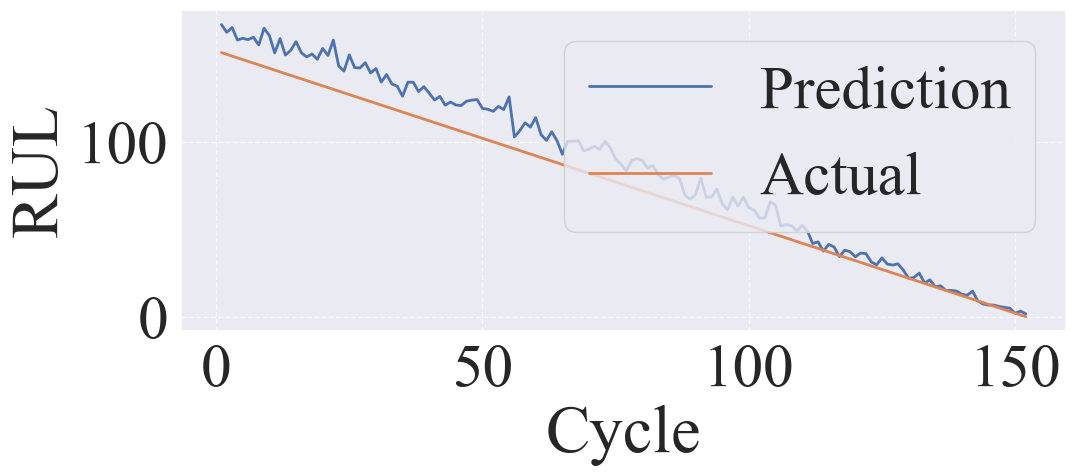

RMSE on Train Set: 13.019048898077244


In [70]:
X1, y1 = give_Train_engine(3,100)
y_pred_train = regressor.predict(X1)

plt.figure(figsize=(12, 6))  # Adjust figure size for better visibility
plt.plot(X1['Cycle'], y_pred_train, linewidth=2)  # Make prediction line thicker
plt.plot(X1['Cycle'], y1, linewidth=2)  # Make actual line thicker
plt.ylabel('RUL')
plt.xlabel('Cycle')
plt.legend(['Prediction', 'Actual'], loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid for better visualization
plt.tight_layout()  # Ensure everything fits in the figure
plt.show()

print('RMSE on Train Set:', np.sqrt(metrics.mean_squared_error(y1, y_pred_train)))


In [71]:
data=pd.read_csv('test_FD001.txt',sep=' ',header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,NaN,NaN
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,NaN,NaN
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,NaN,NaN
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,NaN,NaN


In [72]:
data=data.drop([26,27],axis='columns')
data

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


In [73]:
data.columns = ['ID', 'Cycle', 'Op_Set1', 'Op_Set2', 'Op_Set3'] + [f'Sensor_{i}' for i in range(1, num_sensors + 1)]

In [74]:
#RUL=EOL-Cycle
EOL = []
for i in data['ID']:  # Use unique IDs to avoid redundant iterations
    last_cycle = data[data['ID'] == i]['Cycle'].values[-1]  # Get the last cycle for the ID
    EOL.append(last_cycle)

data['EOL']=EOL
data




,ID,Cycle,Op_Set1,Op_Set2,Op_Set3,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,...,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Sensor_21,EOL
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,31
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,31
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,31
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,31
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,198
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,198
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,198
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,198


In [75]:
# Calculate RUL
data['RUL']=data['EOL']-data['Cycle']
data=data.drop(columns=['EOL'])
data

,ID,Cycle,Op_Set1,Op_Set2,Op_Set3,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,...,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Sensor_21,RUL
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,30
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,29
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,28
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,27
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,4
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,3
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,2
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,1


In [76]:
delete_columns=['Op_Set1','Op_Set2','Op_Set3','Sensor_1','Sensor_5','Sensor_6','Sensor_9','Sensor_10','Sensor_14','Sensor_16','Sensor_18','Sensor_19']	

In [77]:
data=data.drop(columns=delete_columns)
data

,ID,Cycle,Sensor_2,Sensor_3,Sensor_4,Sensor_7,Sensor_8,Sensor_11,Sensor_12,Sensor_13,Sensor_15,Sensor_17,Sensor_20,Sensor_21,RUL
0,1,1,643.02,1585.29,1398.21,553.90,2388.04,47.20,521.72,2388.03,8.4052,392,38.86,23.3735,30
1,1,2,641.71,1588.45,1395.42,554.85,2388.01,47.50,522.16,2388.06,8.3803,393,39.02,23.3916,29
2,1,3,642.46,1586.94,1401.34,554.11,2388.05,47.50,521.97,2388.03,8.4441,393,39.08,23.4166,28
3,1,4,642.44,1584.12,1406.42,554.07,2388.03,47.28,521.38,2388.05,8.3917,391,39.00,23.3737,27
4,1,5,642.51,1587.19,1401.92,554.16,2388.01,47.31,522.15,2388.03,8.4031,390,38.99,23.4130,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,643.24,1599.45,1415.79,553.41,2388.02,47.69,520.69,2388.00,8.4715,394,38.65,23.1974,4
13092,100,195,643.22,1595.69,1422.05,553.22,2388.05,47.60,521.05,2388.09,8.4512,395,38.57,23.2771,3
13093,100,196,643.44,1593.15,1406.82,553.04,2388.11,47.57,521.18,2388.04,8.4569,395,38.62,23.2051,2
13094,100,197,643.26,1594.99,1419.36,553.37,2388.07,47.61,521.33,2388.08,8.4711,395,38.66,23.2699,1


In [78]:
data.to_csv('Processed_test_001.csv',index=None)

In [79]:
data=pd.read_csv('Processed_test_001.csv')

In [80]:
data1=pd.read_csv('test_FD002.txt',sep=' ',header=None)
data1

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,9.9987,0.2502,100.0,489.05,605.03,1497.17,1304.99,10.52,...,8114.10,8.6476,0.03,369,2319,100.00,28.42,17.1551,NaN,NaN
1,1,2,20.0026,0.7000,100.0,491.19,607.82,1481.20,1246.11,9.35,...,8053.06,9.2405,0.02,364,2324,100.00,24.29,14.8039,NaN,NaN
2,1,3,35.0045,0.8400,100.0,449.44,556.00,1359.08,1128.36,5.48,...,8053.04,9.3472,0.02,333,2223,100.00,14.98,8.9125,NaN,NaN
3,1,4,42.0066,0.8410,100.0,445.00,550.17,1349.69,1127.89,3.91,...,8066.90,9.3961,0.02,332,2212,100.00,10.35,6.4181,NaN,NaN
4,1,5,24.9985,0.6213,60.0,462.54,536.72,1253.18,1050.69,7.05,...,7865.66,10.8682,0.02,305,1915,84.93,14.31,8.5740,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33986,259,119,35.0015,0.8403,100.0,449.44,555.56,1366.01,1129.47,5.48,...,8088.36,9.3215,0.02,334,2223,100.00,14.94,8.9065,NaN,NaN
33987,259,120,42.0066,0.8405,100.0,445.00,549.42,1351.13,1123.86,3.91,...,8108.48,9.3542,0.02,332,2212,100.00,10.57,6.4075,NaN,NaN
33988,259,121,42.0061,0.8400,100.0,445.00,549.65,1349.14,1118.91,3.91,...,8098.77,9.3836,0.02,331,2212,100.00,10.57,6.4805,NaN,NaN
33989,259,122,0.0024,0.0003,100.0,518.67,642.58,1589.61,1408.16,14.62,...,8161.85,8.4279,0.03,393,2388,100.00,39.08,23.3589,NaN,NaN


In [81]:
data1=data1.drop([26,27],axis='columns')
data1

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,9.9987,0.2502,100.0,489.05,605.03,1497.17,1304.99,10.52,...,371.69,2388.18,8114.10,8.6476,0.03,369,2319,100.00,28.42,17.1551
1,1,2,20.0026,0.7000,100.0,491.19,607.82,1481.20,1246.11,9.35,...,315.32,2388.12,8053.06,9.2405,0.02,364,2324,100.00,24.29,14.8039
2,1,3,35.0045,0.8400,100.0,449.44,556.00,1359.08,1128.36,5.48,...,183.04,2387.75,8053.04,9.3472,0.02,333,2223,100.00,14.98,8.9125
3,1,4,42.0066,0.8410,100.0,445.00,550.17,1349.69,1127.89,3.91,...,130.40,2387.72,8066.90,9.3961,0.02,332,2212,100.00,10.35,6.4181
4,1,5,24.9985,0.6213,60.0,462.54,536.72,1253.18,1050.69,7.05,...,164.56,2028.05,7865.66,10.8682,0.02,305,1915,84.93,14.31,8.5740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33986,259,119,35.0015,0.8403,100.0,449.44,555.56,1366.01,1129.47,5.48,...,183.05,2388.39,8088.36,9.3215,0.02,334,2223,100.00,14.94,8.9065
33987,259,120,42.0066,0.8405,100.0,445.00,549.42,1351.13,1123.86,3.91,...,130.74,2388.31,8108.48,9.3542,0.02,332,2212,100.00,10.57,6.4075
33988,259,121,42.0061,0.8400,100.0,445.00,549.65,1349.14,1118.91,3.91,...,130.96,2388.34,8098.77,9.3836,0.02,331,2212,100.00,10.57,6.4805
33989,259,122,0.0024,0.0003,100.0,518.67,642.58,1589.61,1408.16,14.62,...,522.25,2388.00,8161.85,8.4279,0.03,393,2388,100.00,39.08,23.3589


In [82]:
data1.columns = ['ID', 'Cycle', 'Op_Set1', 'Op_Set2', 'Op_Set3'] + [f'Sensor_{i}' for i in range(1, num_sensors + 1)]

In [83]:
#RUL=EOL-Cycle
EOL = []
for i in data1['ID']:  # Use unique IDs to avoid redundant iterations
    last_cycle = data1[data1['ID'] == i]['Cycle'].values[-1]  # Get the last cycle for the ID
    EOL.append(last_cycle)

data1['EOL']=EOL
data1




,ID,Cycle,Op_Set1,Op_Set2,Op_Set3,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,...,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Sensor_21,EOL
0,1,1,9.9987,0.2502,100.0,489.05,605.03,1497.17,1304.99,10.52,...,2388.18,8114.10,8.6476,0.03,369,2319,100.00,28.42,17.1551,258
1,1,2,20.0026,0.7000,100.0,491.19,607.82,1481.20,1246.11,9.35,...,2388.12,8053.06,9.2405,0.02,364,2324,100.00,24.29,14.8039,258
2,1,3,35.0045,0.8400,100.0,449.44,556.00,1359.08,1128.36,5.48,...,2387.75,8053.04,9.3472,0.02,333,2223,100.00,14.98,8.9125,258
3,1,4,42.0066,0.8410,100.0,445.00,550.17,1349.69,1127.89,3.91,...,2387.72,8066.90,9.3961,0.02,332,2212,100.00,10.35,6.4181,258
4,1,5,24.9985,0.6213,60.0,462.54,536.72,1253.18,1050.69,7.05,...,2028.05,7865.66,10.8682,0.02,305,1915,84.93,14.31,8.5740,258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33986,259,119,35.0015,0.8403,100.0,449.44,555.56,1366.01,1129.47,5.48,...,2388.39,8088.36,9.3215,0.02,334,2223,100.00,14.94,8.9065,123
33987,259,120,42.0066,0.8405,100.0,445.00,549.42,1351.13,1123.86,3.91,...,2388.31,8108.48,9.3542,0.02,332,2212,100.00,10.57,6.4075,123
33988,259,121,42.0061,0.8400,100.0,445.00,549.65,1349.14,1118.91,3.91,...,2388.34,8098.77,9.3836,0.02,331,2212,100.00,10.57,6.4805,123
33989,259,122,0.0024,0.0003,100.0,518.67,642.58,1589.61,1408.16,14.62,...,2388.00,8161.85,8.4279,0.03,393,2388,100.00,39.08,23.3589,123


In [84]:
# Calculate RUL
data1['RUL']=data1['EOL']-data1['Cycle']
data1=data1.drop(columns=['EOL'])
data1

,ID,Cycle,Op_Set1,Op_Set2,Op_Set3,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,...,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Sensor_21,RUL
0,1,1,9.9987,0.2502,100.0,489.05,605.03,1497.17,1304.99,10.52,...,2388.18,8114.10,8.6476,0.03,369,2319,100.00,28.42,17.1551,257
1,1,2,20.0026,0.7000,100.0,491.19,607.82,1481.20,1246.11,9.35,...,2388.12,8053.06,9.2405,0.02,364,2324,100.00,24.29,14.8039,256
2,1,3,35.0045,0.8400,100.0,449.44,556.00,1359.08,1128.36,5.48,...,2387.75,8053.04,9.3472,0.02,333,2223,100.00,14.98,8.9125,255
3,1,4,42.0066,0.8410,100.0,445.00,550.17,1349.69,1127.89,3.91,...,2387.72,8066.90,9.3961,0.02,332,2212,100.00,10.35,6.4181,254
4,1,5,24.9985,0.6213,60.0,462.54,536.72,1253.18,1050.69,7.05,...,2028.05,7865.66,10.8682,0.02,305,1915,84.93,14.31,8.5740,253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33986,259,119,35.0015,0.8403,100.0,449.44,555.56,1366.01,1129.47,5.48,...,2388.39,8088.36,9.3215,0.02,334,2223,100.00,14.94,8.9065,4
33987,259,120,42.0066,0.8405,100.0,445.00,549.42,1351.13,1123.86,3.91,...,2388.31,8108.48,9.3542,0.02,332,2212,100.00,10.57,6.4075,3
33988,259,121,42.0061,0.8400,100.0,445.00,549.65,1349.14,1118.91,3.91,...,2388.34,8098.77,9.3836,0.02,331,2212,100.00,10.57,6.4805,2
33989,259,122,0.0024,0.0003,100.0,518.67,642.58,1589.61,1408.16,14.62,...,2388.00,8161.85,8.4279,0.03,393,2388,100.00,39.08,23.3589,1


In [85]:
delete_columns=['Op_Set1','Op_Set2','Op_Set3','Sensor_1','Sensor_5','Sensor_6','Sensor_9','Sensor_10','Sensor_14','Sensor_16','Sensor_18','Sensor_19']	

In [86]:
data1=data1.drop(columns=delete_columns)
data1

,ID,Cycle,Sensor_2,Sensor_3,Sensor_4,Sensor_7,Sensor_8,Sensor_11,Sensor_12,Sensor_13,Sensor_15,Sensor_17,Sensor_20,Sensor_21,RUL
0,1,1,605.03,1497.17,1304.99,394.54,2318.96,45.61,371.69,2388.18,8.6476,369,28.42,17.1551,257
1,1,2,607.82,1481.20,1246.11,334.36,2323.95,44.26,315.32,2388.12,9.2405,364,24.29,14.8039,256
2,1,3,556.00,1359.08,1128.36,193.55,2222.67,41.80,183.04,2387.75,9.3472,333,14.98,8.9125,255
3,1,4,550.17,1349.69,1127.89,138.74,2211.58,42.21,130.40,2387.72,9.3961,332,10.35,6.4181,254
4,1,5,536.72,1253.18,1050.69,175.75,1915.10,36.76,164.56,2028.05,10.8682,305,14.31,8.5740,253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33986,259,119,555.56,1366.01,1129.47,194.87,2223.24,41.96,183.05,2388.39,9.3215,334,14.94,8.9065,4
33987,259,120,549.42,1351.13,1123.86,138.34,2212.19,42.00,130.74,2388.31,9.3542,332,10.57,6.4075,3
33988,259,121,549.65,1349.14,1118.91,138.27,2212.29,42.15,130.96,2388.34,9.3836,331,10.57,6.4805,2
33989,259,122,642.58,1589.61,1408.16,553.13,2388.05,47.47,522.25,2388.00,8.4279,393,39.08,23.3589,1


In [87]:
data1.to_csv('Processed_test_002.csv',index=None)

In [88]:
data1=pd.read_csv('Processed_test_002.csv')

In [89]:
data2=pd.read_csv('test_FD003.txt',sep=' ',header=None)
data2

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0017,-0.0004,100.0,518.67,641.94,1581.93,1396.93,14.62,...,8133.48,8.3760,0.03,391,2388,100.0,39.07,23.4468,NaN,NaN
1,1,2,0.0006,-0.0002,100.0,518.67,642.02,1584.86,1398.90,14.62,...,8137.44,8.4062,0.03,391,2388,100.0,39.04,23.4807,NaN,NaN
2,1,3,0.0014,-0.0003,100.0,518.67,641.68,1581.78,1391.92,14.62,...,8138.25,8.3553,0.03,391,2388,100.0,39.10,23.4244,NaN,NaN
3,1,4,0.0027,0.0001,100.0,518.67,642.20,1584.53,1395.34,14.62,...,8137.07,8.3709,0.03,392,2388,100.0,38.97,23.4782,NaN,NaN
4,1,5,-0.0001,0.0001,100.0,518.67,642.46,1589.03,1395.86,14.62,...,8134.20,8.4146,0.03,391,2388,100.0,39.09,23.3950,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16591,100,243,0.0011,-0.0003,100.0,518.67,643.04,1594.99,1411.28,14.62,...,8162.24,8.2939,0.03,395,2388,100.0,39.40,23.4949,NaN,NaN
16592,100,244,-0.0024,0.0002,100.0,518.67,642.47,1591.27,1417.64,14.62,...,8163.24,8.3247,0.03,394,2388,100.0,39.42,23.6011,NaN,NaN
16593,100,245,-0.0053,0.0002,100.0,518.67,642.70,1593.81,1412.70,14.62,...,8162.12,8.3264,0.03,394,2388,100.0,39.43,23.5482,NaN,NaN
16594,100,246,-0.0006,0.0001,100.0,518.67,642.19,1595.63,1406.58,14.62,...,8164.20,8.2908,0.03,395,2388,100.0,39.40,23.6687,NaN,NaN


In [90]:
data2=data2.drop([26,27],axis='columns')
data2

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0017,-0.0004,100.0,518.67,641.94,1581.93,1396.93,14.62,...,521.89,2387.94,8133.48,8.3760,0.03,391,2388,100.0,39.07,23.4468
1,1,2,0.0006,-0.0002,100.0,518.67,642.02,1584.86,1398.90,14.62,...,521.85,2388.01,8137.44,8.4062,0.03,391,2388,100.0,39.04,23.4807
2,1,3,0.0014,-0.0003,100.0,518.67,641.68,1581.78,1391.92,14.62,...,522.10,2387.94,8138.25,8.3553,0.03,391,2388,100.0,39.10,23.4244
3,1,4,0.0027,0.0001,100.0,518.67,642.20,1584.53,1395.34,14.62,...,522.45,2387.96,8137.07,8.3709,0.03,392,2388,100.0,38.97,23.4782
4,1,5,-0.0001,0.0001,100.0,518.67,642.46,1589.03,1395.86,14.62,...,521.91,2387.97,8134.20,8.4146,0.03,391,2388,100.0,39.09,23.3950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16591,100,243,0.0011,-0.0003,100.0,518.67,643.04,1594.99,1411.28,14.62,...,529.23,2388.24,8162.24,8.2939,0.03,395,2388,100.0,39.40,23.4949
16592,100,244,-0.0024,0.0002,100.0,518.67,642.47,1591.27,1417.64,14.62,...,529.27,2388.26,8163.24,8.3247,0.03,394,2388,100.0,39.42,23.6011
16593,100,245,-0.0053,0.0002,100.0,518.67,642.70,1593.81,1412.70,14.62,...,529.48,2388.28,8162.12,8.3264,0.03,394,2388,100.0,39.43,23.5482
16594,100,246,-0.0006,0.0001,100.0,518.67,642.19,1595.63,1406.58,14.62,...,529.39,2388.33,8164.20,8.2908,0.03,395,2388,100.0,39.40,23.6687


In [91]:
data2.columns = ['ID', 'Cycle', 'Op_Set1', 'Op_Set2', 'Op_Set3'] + [f'Sensor_{i}' for i in range(1, num_sensors + 1)]

In [92]:
#RUL=EOL-Cycle
EOL = []
for i in data2['ID']:  # Use unique IDs to avoid redundant iterations
    last_cycle = data2[data2['ID'] == i]['Cycle'].values[-1]  # Get the last cycle for the ID
    EOL.append(last_cycle)

data2['EOL']=EOL
data2




,ID,Cycle,Op_Set1,Op_Set2,Op_Set3,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,...,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Sensor_21,EOL
0,1,1,-0.0017,-0.0004,100.0,518.67,641.94,1581.93,1396.93,14.62,...,2387.94,8133.48,8.3760,0.03,391,2388,100.0,39.07,23.4468,233
1,1,2,0.0006,-0.0002,100.0,518.67,642.02,1584.86,1398.90,14.62,...,2388.01,8137.44,8.4062,0.03,391,2388,100.0,39.04,23.4807,233
2,1,3,0.0014,-0.0003,100.0,518.67,641.68,1581.78,1391.92,14.62,...,2387.94,8138.25,8.3553,0.03,391,2388,100.0,39.10,23.4244,233
3,1,4,0.0027,0.0001,100.0,518.67,642.20,1584.53,1395.34,14.62,...,2387.96,8137.07,8.3709,0.03,392,2388,100.0,38.97,23.4782,233
4,1,5,-0.0001,0.0001,100.0,518.67,642.46,1589.03,1395.86,14.62,...,2387.97,8134.20,8.4146,0.03,391,2388,100.0,39.09,23.3950,233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16591,100,243,0.0011,-0.0003,100.0,518.67,643.04,1594.99,1411.28,14.62,...,2388.24,8162.24,8.2939,0.03,395,2388,100.0,39.40,23.4949,247
16592,100,244,-0.0024,0.0002,100.0,518.67,642.47,1591.27,1417.64,14.62,...,2388.26,8163.24,8.3247,0.03,394,2388,100.0,39.42,23.6011,247
16593,100,245,-0.0053,0.0002,100.0,518.67,642.70,1593.81,1412.70,14.62,...,2388.28,8162.12,8.3264,0.03,394,2388,100.0,39.43,23.5482,247
16594,100,246,-0.0006,0.0001,100.0,518.67,642.19,1595.63,1406.58,14.62,...,2388.33,8164.20,8.2908,0.03,395,2388,100.0,39.40,23.6687,247


In [93]:
# Calculate RUL
data2['RUL']=data2['EOL']-data2['Cycle']
data2=data2.drop(columns=['EOL'])
data2

,ID,Cycle,Op_Set1,Op_Set2,Op_Set3,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,...,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Sensor_21,RUL
0,1,1,-0.0017,-0.0004,100.0,518.67,641.94,1581.93,1396.93,14.62,...,2387.94,8133.48,8.3760,0.03,391,2388,100.0,39.07,23.4468,232
1,1,2,0.0006,-0.0002,100.0,518.67,642.02,1584.86,1398.90,14.62,...,2388.01,8137.44,8.4062,0.03,391,2388,100.0,39.04,23.4807,231
2,1,3,0.0014,-0.0003,100.0,518.67,641.68,1581.78,1391.92,14.62,...,2387.94,8138.25,8.3553,0.03,391,2388,100.0,39.10,23.4244,230
3,1,4,0.0027,0.0001,100.0,518.67,642.20,1584.53,1395.34,14.62,...,2387.96,8137.07,8.3709,0.03,392,2388,100.0,38.97,23.4782,229
4,1,5,-0.0001,0.0001,100.0,518.67,642.46,1589.03,1395.86,14.62,...,2387.97,8134.20,8.4146,0.03,391,2388,100.0,39.09,23.3950,228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16591,100,243,0.0011,-0.0003,100.0,518.67,643.04,1594.99,1411.28,14.62,...,2388.24,8162.24,8.2939,0.03,395,2388,100.0,39.40,23.4949,4
16592,100,244,-0.0024,0.0002,100.0,518.67,642.47,1591.27,1417.64,14.62,...,2388.26,8163.24,8.3247,0.03,394,2388,100.0,39.42,23.6011,3
16593,100,245,-0.0053,0.0002,100.0,518.67,642.70,1593.81,1412.70,14.62,...,2388.28,8162.12,8.3264,0.03,394,2388,100.0,39.43,23.5482,2
16594,100,246,-0.0006,0.0001,100.0,518.67,642.19,1595.63,1406.58,14.62,...,2388.33,8164.20,8.2908,0.03,395,2388,100.0,39.40,23.6687,1


In [94]:
delete_columns=['Op_Set1','Op_Set2','Op_Set3','Sensor_1','Sensor_5','Sensor_6','Sensor_9','Sensor_10','Sensor_14','Sensor_16','Sensor_18','Sensor_19']	

In [95]:
data2=data2.drop(columns=delete_columns)
data2

,ID,Cycle,Sensor_2,Sensor_3,Sensor_4,Sensor_7,Sensor_8,Sensor_11,Sensor_12,Sensor_13,Sensor_15,Sensor_17,Sensor_20,Sensor_21,RUL
0,1,1,641.94,1581.93,1396.93,554.56,2387.93,47.09,521.89,2387.94,8.3760,391,39.07,23.4468,232
1,1,2,642.02,1584.86,1398.90,554.10,2387.94,47.08,521.85,2388.01,8.4062,391,39.04,23.4807,231
2,1,3,641.68,1581.78,1391.92,554.41,2387.97,47.15,522.10,2387.94,8.3553,391,39.10,23.4244,230
3,1,4,642.20,1584.53,1395.34,554.58,2387.94,47.26,522.45,2387.96,8.3709,392,38.97,23.4782,229
4,1,5,642.46,1589.03,1395.86,554.16,2388.01,46.94,521.91,2387.97,8.4146,391,39.09,23.3950,228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16591,100,243,643.04,1594.99,1411.28,561.21,2388.24,47.61,529.23,2388.24,8.2939,395,39.40,23.4949,4
16592,100,244,642.47,1591.27,1417.64,561.02,2388.29,47.75,529.27,2388.26,8.3247,394,39.42,23.6011,3
16593,100,245,642.70,1593.81,1412.70,561.16,2388.23,47.60,529.48,2388.28,8.3264,394,39.43,23.5482,2
16594,100,246,642.19,1595.63,1406.58,562.66,2388.24,47.69,529.39,2388.33,8.2908,395,39.40,23.6687,1


In [96]:
data2.to_csv('Processed_test_003.csv',index=None)

In [97]:
data2=pd.read_csv('Processed_test_003.csv')

In [98]:
data3=pd.read_csv('test_FD004.txt',sep=' ',header=None)
data3

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,20.0072,0.7000,100.0,491.19,606.67,1481.04,1227.81,9.35,...,8048.98,9.2229,0.02,362,2324,100.00,24.31,14.7007,NaN,NaN
1,1,2,24.9984,0.6200,60.0,462.54,536.22,1256.17,1031.48,7.05,...,7863.46,10.8632,0.02,306,1915,84.93,14.36,8.5748,NaN,NaN
2,1,3,42.0000,0.8420,100.0,445.00,549.23,1340.13,1105.88,3.91,...,8071.13,9.3960,0.02,328,2212,100.00,10.39,6.4365,NaN,NaN
3,1,4,42.0035,0.8402,100.0,445.00,549.19,1339.70,1107.26,3.91,...,8078.89,9.3594,0.02,328,2212,100.00,10.56,6.2367,NaN,NaN
4,1,5,35.0079,0.8400,100.0,449.44,555.10,1353.04,1117.80,5.48,...,8057.83,9.3030,0.02,333,2223,100.00,14.85,8.9326,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41209,248,277,41.9991,0.8401,100.0,445.00,550.30,1364.40,1129.17,3.91,...,8112.61,9.4427,0.02,331,2212,100.00,10.53,6.2620,NaN,NaN
41210,248,278,20.0026,0.7005,100.0,491.19,608.00,1494.75,1260.88,9.35,...,8086.83,9.2772,0.02,366,2324,100.00,24.33,14.6486,NaN,NaN
41211,248,279,34.9988,0.8413,100.0,449.44,555.92,1370.65,1130.97,5.48,...,8100.84,9.3982,0.02,336,2223,100.00,14.69,8.8389,NaN,NaN
41212,248,280,20.0027,0.7000,100.0,491.19,608.19,1489.11,1256.25,9.35,...,8085.24,9.2727,0.03,366,2324,100.00,24.44,14.6887,NaN,NaN


In [99]:
data3=data3.drop([26,27],axis='columns')
data3

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,20.0072,0.7000,100.0,491.19,606.67,1481.04,1227.81,9.35,...,313.03,2387.78,8048.98,9.2229,0.02,362,2324,100.00,24.31,14.7007
1,1,2,24.9984,0.6200,60.0,462.54,536.22,1256.17,1031.48,7.05,...,163.61,2028.09,7863.46,10.8632,0.02,306,1915,84.93,14.36,8.5748
2,1,3,42.0000,0.8420,100.0,445.00,549.23,1340.13,1105.88,3.91,...,129.98,2387.95,8071.13,9.3960,0.02,328,2212,100.00,10.39,6.4365
3,1,4,42.0035,0.8402,100.0,445.00,549.19,1339.70,1107.26,3.91,...,129.48,2387.90,8078.89,9.3594,0.02,328,2212,100.00,10.56,6.2367
4,1,5,35.0079,0.8400,100.0,449.44,555.10,1353.04,1117.80,5.48,...,181.82,2387.87,8057.83,9.3030,0.02,333,2223,100.00,14.85,8.9326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41209,248,277,41.9991,0.8401,100.0,445.00,550.30,1364.40,1129.17,3.91,...,130.87,2388.50,8112.61,9.4427,0.02,331,2212,100.00,10.53,6.2620
41210,248,278,20.0026,0.7005,100.0,491.19,608.00,1494.75,1260.88,9.35,...,314.51,2388.33,8086.83,9.2772,0.02,366,2324,100.00,24.33,14.6486
41211,248,279,34.9988,0.8413,100.0,449.44,555.92,1370.65,1130.97,5.48,...,182.76,2388.64,8100.84,9.3982,0.02,336,2223,100.00,14.69,8.8389
41212,248,280,20.0027,0.7000,100.0,491.19,608.19,1489.11,1256.25,9.35,...,314.17,2388.37,8085.24,9.2727,0.03,366,2324,100.00,24.44,14.6887


In [100]:
data3.columns = ['ID', 'Cycle', 'Op_Set1', 'Op_Set2', 'Op_Set3'] + [f'Sensor_{i}' for i in range(1, num_sensors + 1)]

In [101]:
#RUL=EOL-Cycle
EOL = []
for i in data3['ID']:  # Use unique IDs to avoid redundant iterations
    last_cycle = data3[data3['ID'] == i]['Cycle'].values[-1]  # Get the last cycle for the ID
    EOL.append(last_cycle)

data3['EOL']=EOL
data3




,ID,Cycle,Op_Set1,Op_Set2,Op_Set3,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,...,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Sensor_21,EOL
0,1,1,20.0072,0.7000,100.0,491.19,606.67,1481.04,1227.81,9.35,...,2387.78,8048.98,9.2229,0.02,362,2324,100.00,24.31,14.7007,230
1,1,2,24.9984,0.6200,60.0,462.54,536.22,1256.17,1031.48,7.05,...,2028.09,7863.46,10.8632,0.02,306,1915,84.93,14.36,8.5748,230
2,1,3,42.0000,0.8420,100.0,445.00,549.23,1340.13,1105.88,3.91,...,2387.95,8071.13,9.3960,0.02,328,2212,100.00,10.39,6.4365,230
3,1,4,42.0035,0.8402,100.0,445.00,549.19,1339.70,1107.26,3.91,...,2387.90,8078.89,9.3594,0.02,328,2212,100.00,10.56,6.2367,230
4,1,5,35.0079,0.8400,100.0,449.44,555.10,1353.04,1117.80,5.48,...,2387.87,8057.83,9.3030,0.02,333,2223,100.00,14.85,8.9326,230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41209,248,277,41.9991,0.8401,100.0,445.00,550.30,1364.40,1129.17,3.91,...,2388.50,8112.61,9.4427,0.02,331,2212,100.00,10.53,6.2620,281
41210,248,278,20.0026,0.7005,100.0,491.19,608.00,1494.75,1260.88,9.35,...,2388.33,8086.83,9.2772,0.02,366,2324,100.00,24.33,14.6486,281
41211,248,279,34.9988,0.8413,100.0,449.44,555.92,1370.65,1130.97,5.48,...,2388.64,8100.84,9.3982,0.02,336,2223,100.00,14.69,8.8389,281
41212,248,280,20.0027,0.7000,100.0,491.19,608.19,1489.11,1256.25,9.35,...,2388.37,8085.24,9.2727,0.03,366,2324,100.00,24.44,14.6887,281


In [102]:
# Calculate RUL
data3['RUL']=data3['EOL']-data3['Cycle']
data3=data3.drop(columns=['EOL'])
data3

,ID,Cycle,Op_Set1,Op_Set2,Op_Set3,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,...,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Sensor_21,RUL
0,1,1,20.0072,0.7000,100.0,491.19,606.67,1481.04,1227.81,9.35,...,2387.78,8048.98,9.2229,0.02,362,2324,100.00,24.31,14.7007,229
1,1,2,24.9984,0.6200,60.0,462.54,536.22,1256.17,1031.48,7.05,...,2028.09,7863.46,10.8632,0.02,306,1915,84.93,14.36,8.5748,228
2,1,3,42.0000,0.8420,100.0,445.00,549.23,1340.13,1105.88,3.91,...,2387.95,8071.13,9.3960,0.02,328,2212,100.00,10.39,6.4365,227
3,1,4,42.0035,0.8402,100.0,445.00,549.19,1339.70,1107.26,3.91,...,2387.90,8078.89,9.3594,0.02,328,2212,100.00,10.56,6.2367,226
4,1,5,35.0079,0.8400,100.0,449.44,555.10,1353.04,1117.80,5.48,...,2387.87,8057.83,9.3030,0.02,333,2223,100.00,14.85,8.9326,225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41209,248,277,41.9991,0.8401,100.0,445.00,550.30,1364.40,1129.17,3.91,...,2388.50,8112.61,9.4427,0.02,331,2212,100.00,10.53,6.2620,4
41210,248,278,20.0026,0.7005,100.0,491.19,608.00,1494.75,1260.88,9.35,...,2388.33,8086.83,9.2772,0.02,366,2324,100.00,24.33,14.6486,3
41211,248,279,34.9988,0.8413,100.0,449.44,555.92,1370.65,1130.97,5.48,...,2388.64,8100.84,9.3982,0.02,336,2223,100.00,14.69,8.8389,2
41212,248,280,20.0027,0.7000,100.0,491.19,608.19,1489.11,1256.25,9.35,...,2388.37,8085.24,9.2727,0.03,366,2324,100.00,24.44,14.6887,1


In [103]:
delete_columns=['Op_Set1','Op_Set2','Op_Set3','Sensor_1','Sensor_5','Sensor_6','Sensor_9','Sensor_10','Sensor_14','Sensor_16','Sensor_18','Sensor_19']	
	

In [104]:
data3=data3.drop(columns=delete_columns)
data3

,ID,Cycle,Sensor_2,Sensor_3,Sensor_4,Sensor_7,Sensor_8,Sensor_11,Sensor_12,Sensor_13,Sensor_15,Sensor_17,Sensor_20,Sensor_21,RUL
0,1,1,606.67,1481.04,1227.81,332.52,2323.67,43.83,313.03,2387.78,9.2229,362,24.31,14.7007,229
1,1,2,536.22,1256.17,1031.48,174.46,1915.21,36.11,163.61,2028.09,10.8632,306,14.36,8.5748,228
2,1,3,549.23,1340.13,1105.88,137.34,2211.93,41.52,129.98,2387.95,9.3960,328,10.39,6.4365,227
3,1,4,549.19,1339.70,1107.26,137.23,2211.89,41.73,129.48,2387.90,9.3594,328,10.56,6.2367,226
4,1,5,555.10,1353.04,1117.80,192.94,2222.71,41.32,181.82,2387.87,9.3030,333,14.85,8.9326,225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41209,248,277,550.30,1364.40,1129.17,138.34,2212.35,42.30,130.87,2388.50,9.4427,331,10.53,6.2620,4
41210,248,278,608.00,1494.75,1260.88,334.75,2324.23,44.53,314.51,2388.33,9.2772,366,24.33,14.6486,3
41211,248,279,555.92,1370.65,1130.97,194.92,2223.57,42.33,182.76,2388.64,9.3982,336,14.69,8.8389,2
41212,248,280,608.19,1489.11,1256.25,333.15,2324.19,44.78,314.17,2388.37,9.2727,366,24.44,14.6887,1


In [105]:
data3.to_csv('Processed_test_004.csv',index=None)

In [106]:
data3=pd.read_csv('Processed_test_004.csv')

In [107]:
#Importing all testing data
df_test=pd.concat([data,data1,data2,data3])

In [108]:
df_test=df_test.drop(columns=['ID'])
df_test

,Cycle,Sensor_2,Sensor_3,Sensor_4,Sensor_7,Sensor_8,Sensor_11,Sensor_12,Sensor_13,Sensor_15,Sensor_17,Sensor_20,Sensor_21,RUL
0,1,643.02,1585.29,1398.21,553.90,2388.04,47.20,521.72,2388.03,8.4052,392,38.86,23.3735,30
1,2,641.71,1588.45,1395.42,554.85,2388.01,47.50,522.16,2388.06,8.3803,393,39.02,23.3916,29
2,3,642.46,1586.94,1401.34,554.11,2388.05,47.50,521.97,2388.03,8.4441,393,39.08,23.4166,28
3,4,642.44,1584.12,1406.42,554.07,2388.03,47.28,521.38,2388.05,8.3917,391,39.00,23.3737,27
4,5,642.51,1587.19,1401.92,554.16,2388.01,47.31,522.15,2388.03,8.4031,390,38.99,23.4130,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41209,277,550.30,1364.40,1129.17,138.34,2212.35,42.30,130.87,2388.50,9.4427,331,10.53,6.2620,4
41210,278,608.00,1494.75,1260.88,334.75,2324.23,44.53,314.51,2388.33,9.2772,366,24.33,14.6486,3
41211,279,555.92,1370.65,1130.97,194.92,2223.57,42.33,182.76,2388.64,9.3982,336,14.69,8.8389,2
41212,280,608.19,1489.11,1256.25,333.15,2324.19,44.78,314.17,2388.37,9.2727,366,24.44,14.6887,1


In [109]:
X=df_test.iloc[:,0:-1]
y=df_test.iloc[:,-1]

In [110]:
print(X.shape)
print(y.shape)


(104897, 13)
(104897,)


In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [112]:

regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [113]:
y_pred=regressor.predict(X_test)
print('RMSE on Test Set:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

y_pred_test=regressor.predict(X_train)
print('RMSE on Training set:',np.sqrt(metrics.mean_squared_error(y_train,y_pred_test)))


RMSE on Test Set: 67.77981266135929
RMSE on Training set: 22.67240076893891


In [114]:
#Moving Average
def moving_average(window_size,y_pred):
    numbers_series=pd.Series(y_pred)
    windows=numbers_series.rolling(window_size)
    moving_averages=windows.mean()

    moving_averages_list=moving_averages.tolist()
    y_pred_avg=moving_averages_list[window_size-1:]
    return y_pred_avg

RMSE on Test Set: 74.73728145436161


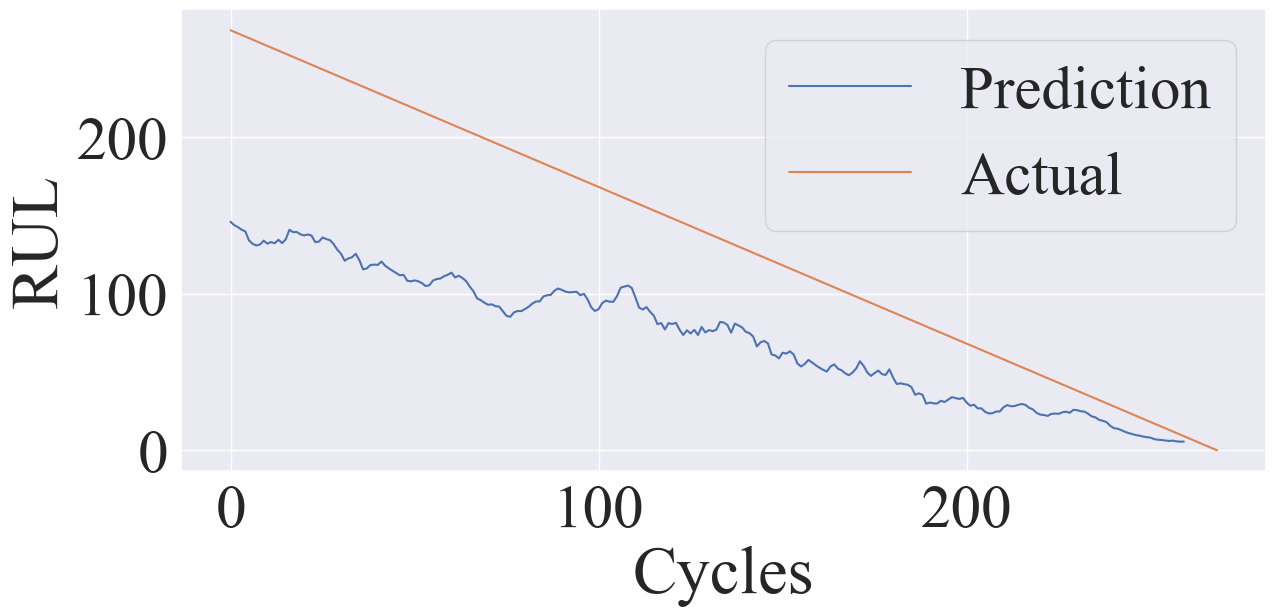

In [115]:
X_test, y_test = give_Test_engine(1, 5)
y_pred = regressor.predict(X_test)

window_size = 10
y_pred = moving_average(window_size, y_pred)

print('RMSE on Test Set:', np.sqrt(metrics.mean_squared_error(y_test[0:len(y_pred)], y_pred)))

plt.figure(figsize=(14, 6))  # Adjust the width (14) and height (6)
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.ylabel('RUL')
plt.xlabel('Cycles')
plt.legend(['Prediction', 'Actual'])
plt.show()


In [116]:
# Correcting the param_grid
param_grid = {'max_features': ['log2', 'sqrt'], 'n_estimators': [100, 200, 250, 350]}

# Performing Grid Search for hyperparameter tuning
RF = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, scoring='neg_root_mean_squared_error',
                  n_jobs=-1, cv=10)
RF.fit(X_train, y_train)

# Making predictions
y_pred = RF.predict(X_test)
print('RMSE on Test Set:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

y_pred_train = RF.predict(X_train)
print('RMSE on Training set:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))


RMSE on Test Set: 71.89426958851578
RMSE on Training set: 22.15313891368182


In [ ]:
RF=RandomForestRegressor(n_estimators=350,max_features='log2')
RF.fit(X_train,y_train)
y_pred=RF.predict(X_test)
print('RMSE on Test set:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

y_pred_train=RF.predict(X_train)
print('RMSE on TRaining Set:',np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))
